In [1]:
import torch
import torch.nn as nn
import torch.utils.data
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
import operator
from PIL import Image

device = torch.device('cpu')

In [2]:
def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def make_sun():
    size = 28
    xx, yy = np.meshgrid(np.arange(size)-(size-1)/2.,np.arange(size)-(size-1)/2)
    r = np.sqrt(xx*xx+yy*yy) 
    rad = np.random.rand(1)*(size/3)
    image = np.exp(-(r*r)/(rad*rad))*(rad**rad_power)
    return image

def make_sun_multi_channel(num_channels=5):
    size = 28
    xx, yy = np.meshgrid(np.arange(size)-(size-1)/2.,np.arange(size)-(size-1)/2)
    r = np.sqrt(xx*xx+yy*yy) 
    rad = np.random.rand(1)*(size/3)
    channels = []
    for c in range(num_channels):
        channels.append(np.exp(-(r*r)/(rad*rad))*(rad**(c/10.)))
    image = torch.cat([torch.from_numpy(channel).float().to(device) for channel in channels]).view(num_channels, 28, 28)
    return image

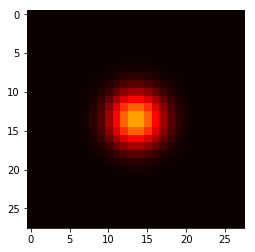

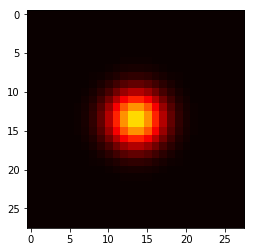

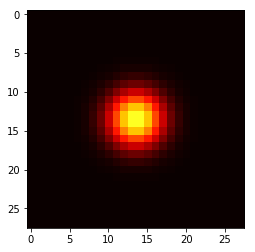

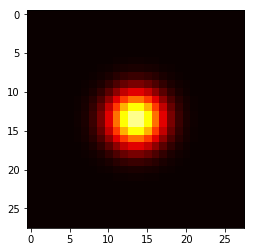

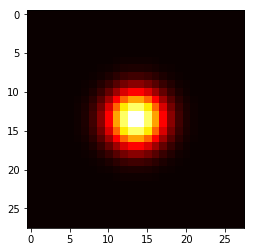

In [3]:
sun = make_sun_multi_channel()
sun_numpy = sun.numpy()

for channel in sun_numpy:
    plt.imshow(channel, norm=None, cmap='hot', vmin=sun_numpy.min(), vmax=sun_numpy.max())
    plt.show()


In [4]:
class NetCNN(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._conv2d1 = nn.Conv2d(in_channels=self._input_channels, out_channels=64, kernel_size=3)
        self._conv2d2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self._cnn_output_dim = self._cnn(torch.zeros(input_shape).unsqueeze(0)).nelement()
        print('cnn_output_dim: {}'.format(self._cnn_output_dim))
        self._fc1 = nn.Linear(self._cnn_output_dim, 256)
        self._fc2 = nn.Linear(256, output_dim)
        
    def _cnn(self, x):
        x = self._conv2d1(x)
        x = torch.relu(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        x = self._conv2d2(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        return x
    
    
    def forward(self, x):
        batch_dim = x.shape[0]
        x = self._cnn(x).view(batch_dim, -1)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = 2 * (torch.sigmoid(x) - 0.5)
        return x
    
class NetFF(nn.Module):
    def __init__(self, input_shape, output_dim):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._input_dim = prod(input_shape)
        print('input_dim: {}'.format(self._input_dim))
        self._fc1 = nn.Linear(self._input_dim, 64)
        self._fc2 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        x = x.view(-1, self._input_dim)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = 2 * (torch.sigmoid(x) - 0.5)
        return x

input_channels: 5
cnn_output_dim: 512
Current loss: 0.3526803255081177
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2061954140663147, dimming (predicted): 0.000494837760925293


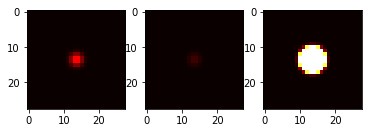

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3416178226470947, dimming (predicted): -0.015955448150634766


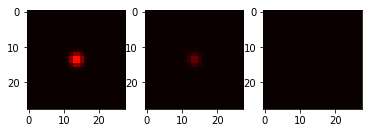

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8348162174224854, dimming (predicted): 0.012463688850402832


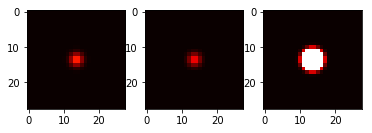

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9571313858032227, dimming (predicted): -0.004959762096405029


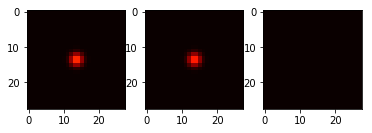

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.22158575057983398, dimming (predicted): -0.0012824535369873047


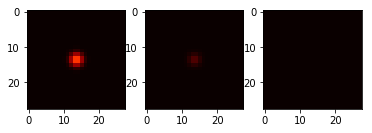

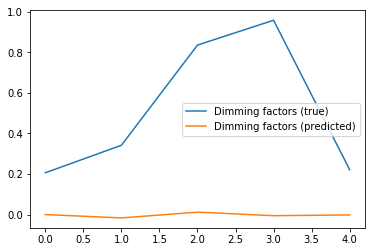

Current loss: 0.11379198729991913
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.47049832344055176, dimming (predicted): 0.9081681966781616


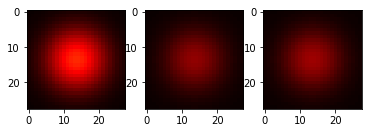

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9360153079032898, dimming (predicted): 0.8507561683654785


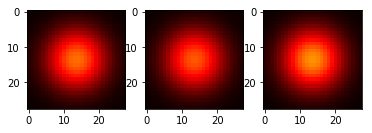

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.48160314559936523, dimming (predicted): 0.9617239236831665


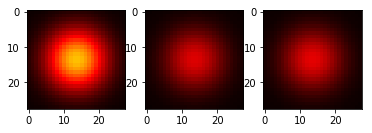

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4508875012397766, dimming (predicted): 0.7931121587753296


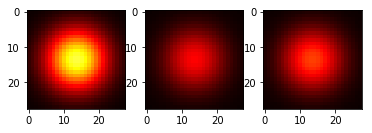

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6277793645858765, dimming (predicted): 0.8823736906051636


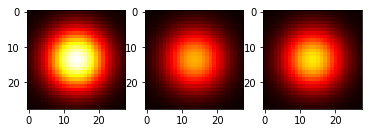

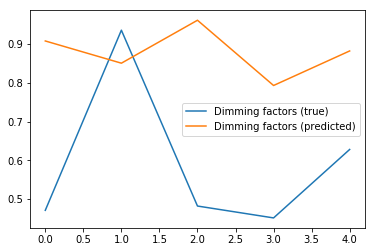

Current loss: 0.07533721625804901
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4641963243484497, dimming (predicted): 0.3428763151168823


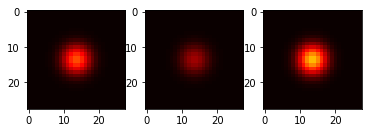

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.020744383335113525, dimming (predicted): 0.3739619255065918


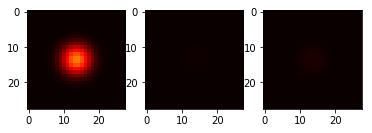

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9013757109642029, dimming (predicted): 0.44330930709838867


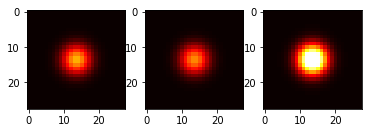

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8656721115112305, dimming (predicted): 0.5172587633132935


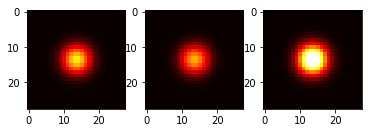

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5068124532699585, dimming (predicted): 0.3422417640686035


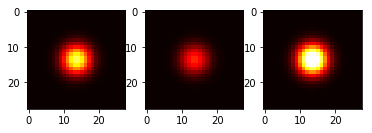

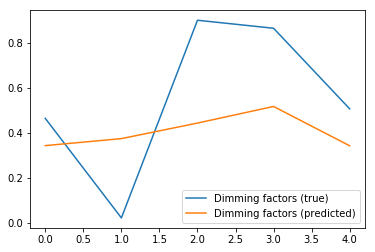

Current loss: 0.05324576795101166
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8033472895622253, dimming (predicted): 0.5892925262451172


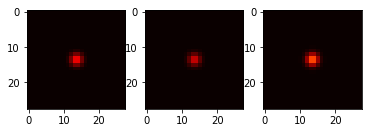

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42833757400512695, dimming (predicted): 0.5564957857131958


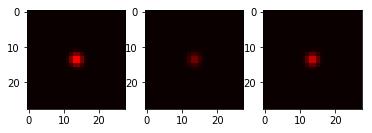

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.06993895769119263, dimming (predicted): 0.4181046485900879


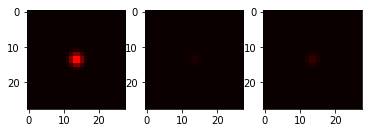

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20785963535308838, dimming (predicted): 0.42835068702697754


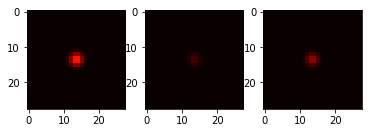

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.49190086126327515, dimming (predicted): 0.3743518590927124


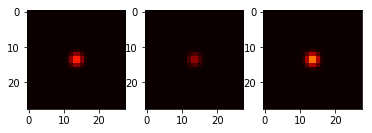

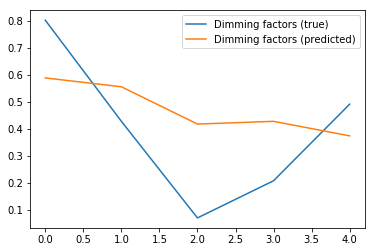

Current loss: 0.05974746495485306
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9706556797027588, dimming (predicted): 0.5480166673660278


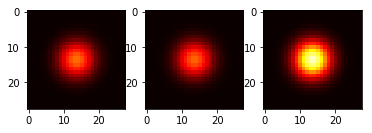

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7173680663108826, dimming (predicted): 0.500450849533081


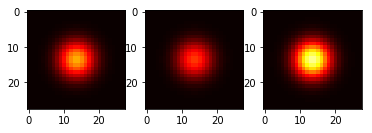

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7780992388725281, dimming (predicted): 0.5573592185974121


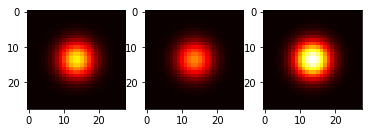

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8821656107902527, dimming (predicted): 0.566441535949707


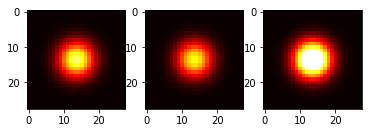

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8508234024047852, dimming (predicted): 0.7103573083877563


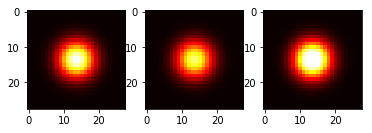

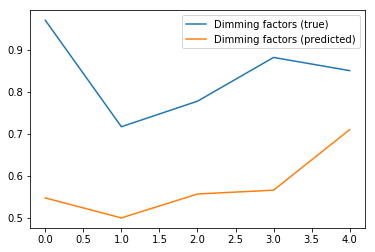

Current loss: 0.02827254869043827
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21138852834701538, dimming (predicted): 0.37943172454833984


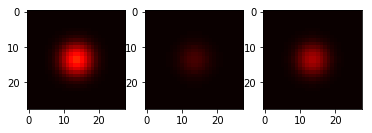

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.45695674419403076, dimming (predicted): 0.3273477554321289


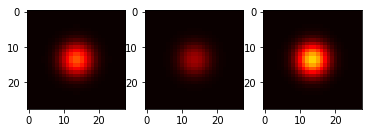

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3407352566719055, dimming (predicted): 0.5277969837188721


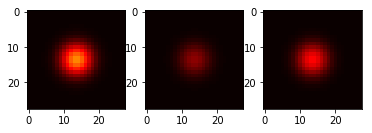

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8886483907699585, dimming (predicted): 0.7942339181900024


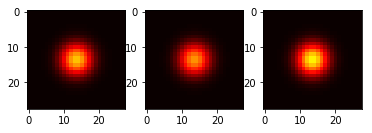

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1969795823097229, dimming (predicted): 0.28842270374298096


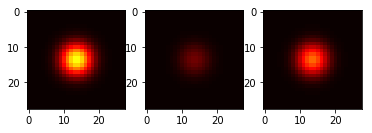

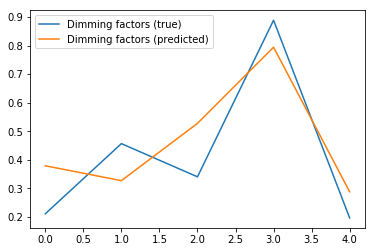

Current loss: 0.05165785923600197
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.789482057094574, dimming (predicted): 0.5584937334060669


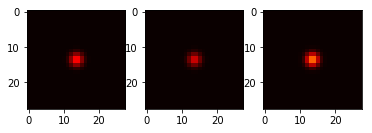

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.774032711982727, dimming (predicted): 0.4115889072418213


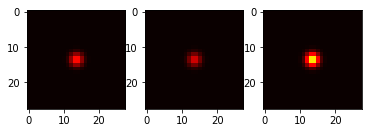

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6182835102081299, dimming (predicted): 0.6233371496200562


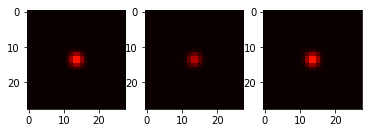

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.933968186378479, dimming (predicted): 0.5247228145599365


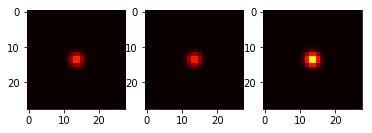

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.17851221561431885, dimming (predicted): 0.4999309778213501


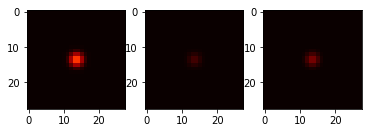

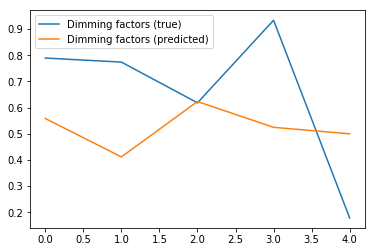

Current loss: 0.03229020535945892
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9080846309661865, dimming (predicted): 0.8513877391815186


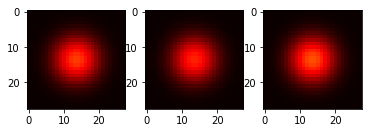

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3114299774169922, dimming (predicted): 0.6994380950927734


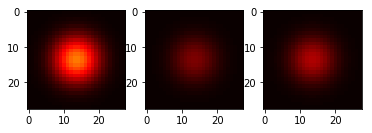

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.33066338300704956, dimming (predicted): 0.3683817386627197


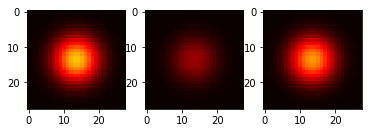

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.29920756816864014, dimming (predicted): 0.4215703010559082


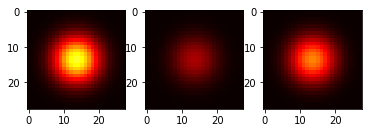

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.009198606014251709, dimming (predicted): 0.19987404346466064


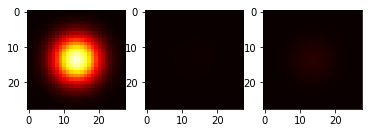

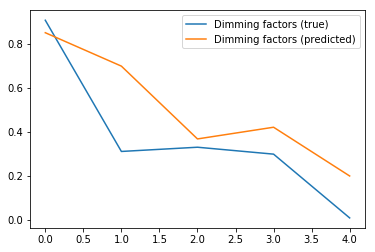

Current loss: 0.05269310623407364
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.05667656660079956, dimming (predicted): 0.3501579761505127


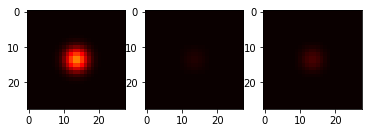

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7270767092704773, dimming (predicted): 0.6520500183105469


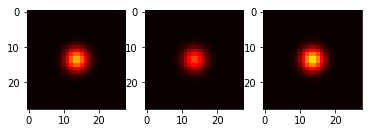

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16639524698257446, dimming (predicted): 0.49398505687713623


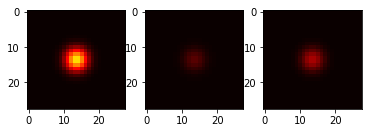

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1925249695777893, dimming (predicted): 0.48111724853515625


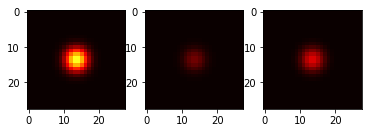

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42951154708862305, dimming (predicted): 0.5680066347122192


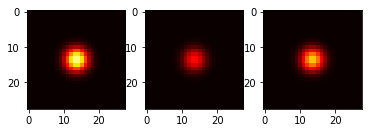

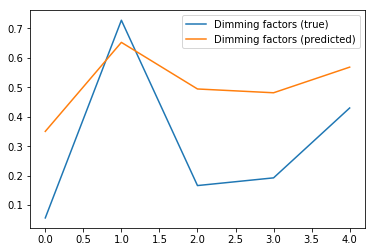

Current loss: 0.015992095693945885
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8312617540359497, dimming (predicted): 0.7090871334075928


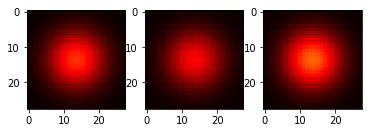

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.539755642414093, dimming (predicted): 0.49028587341308594


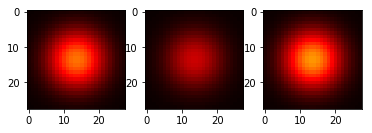

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20439481735229492, dimming (predicted): 0.27216625213623047


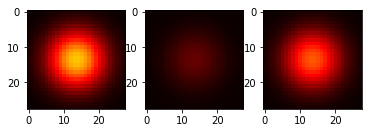

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.49300330877304077, dimming (predicted): 0.5027936697006226


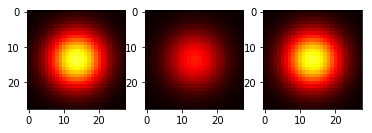

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.05601626634597778, dimming (predicted): 0.0006108283996582031


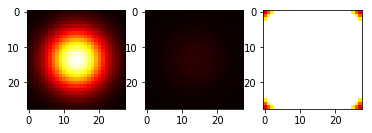

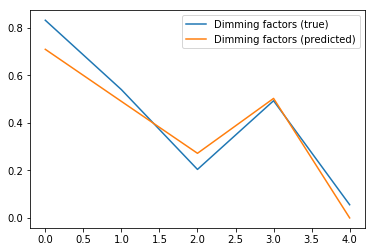

Current loss: 0.02004324086010456
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8677323460578918, dimming (predicted): 0.7863339185714722


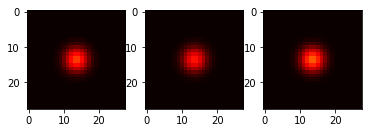

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6305621266365051, dimming (predicted): 0.6601113080978394


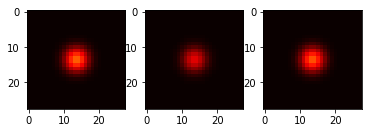

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9464319348335266, dimming (predicted): 0.7434173822402954


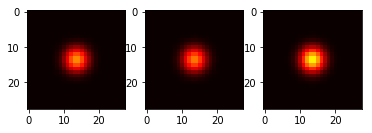

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8171091675758362, dimming (predicted): 0.6216294765472412


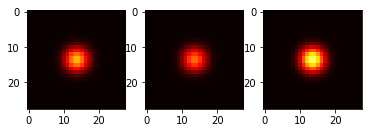

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5780244469642639, dimming (predicted): 0.385465145111084


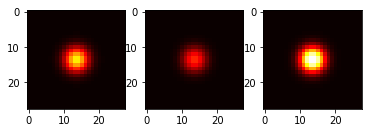

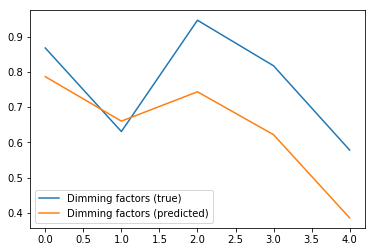

Current loss: 0.029199540615081787
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5061302185058594, dimming (predicted): 0.6557748317718506


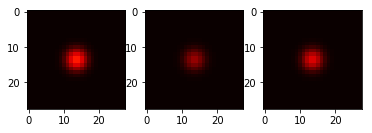

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2557203769683838, dimming (predicted): 0.4574928283691406


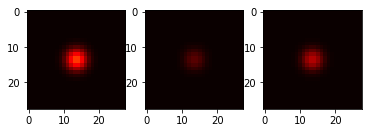

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.04126089811325073, dimming (predicted): 0.20498192310333252


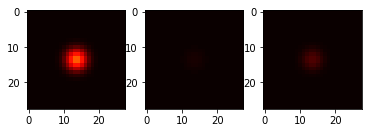

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.05537259578704834, dimming (predicted): 0.278348445892334


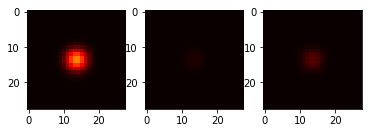

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.762378990650177, dimming (predicted): 0.7499152421951294


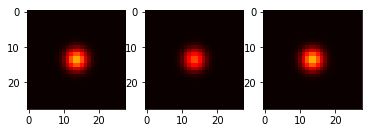

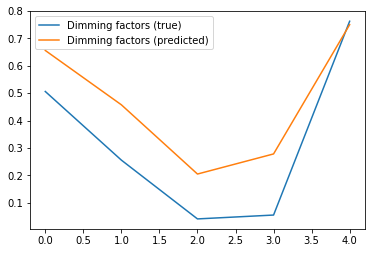

Current loss: 0.01514715701341629
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8134377598762512, dimming (predicted): 0.8103879690170288


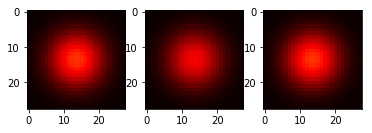

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.39940929412841797, dimming (predicted): 0.350567102432251


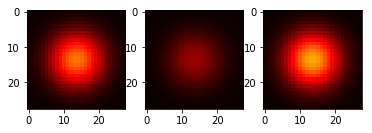

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8913260698318481, dimming (predicted): 0.8872195482254028


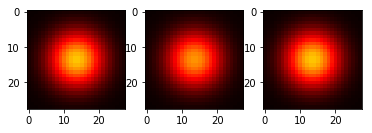

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8023512959480286, dimming (predicted): 0.7968837022781372


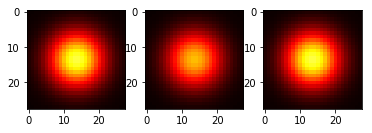

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4528484344482422, dimming (predicted): 0.43217146396636963


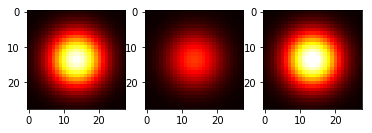

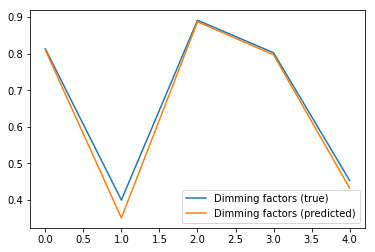

Current loss: 0.03652888163924217
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.039451777935028076, dimming (predicted): 0.10054910182952881


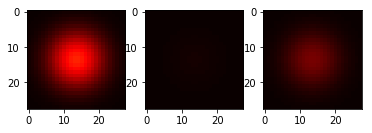

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.40129750967025757, dimming (predicted): 0.5549156665802002


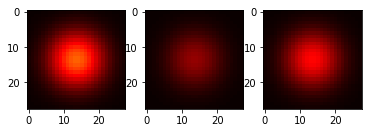

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5562736392021179, dimming (predicted): 0.5326446294784546


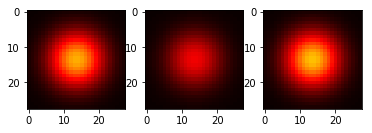

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5147759318351746, dimming (predicted): 0.6567710638046265


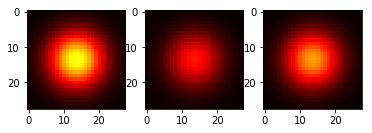

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3341848850250244, dimming (predicted): 0.36733222007751465


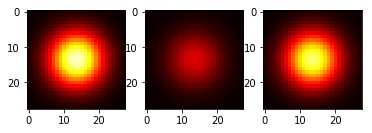

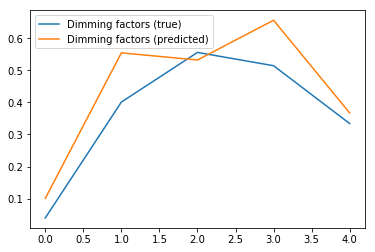

Current loss: 0.03186802938580513
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5866089463233948, dimming (predicted): 0.4897996187210083


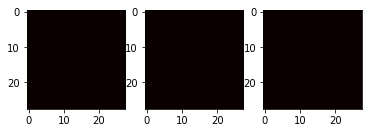

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9552182555198669, dimming (predicted): 0.49982619285583496


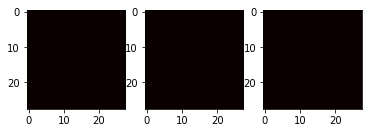

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5632786154747009, dimming (predicted): 0.4708578586578369


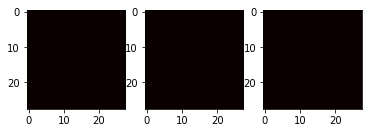

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.11704927682876587, dimming (predicted): 0.4016517400741577


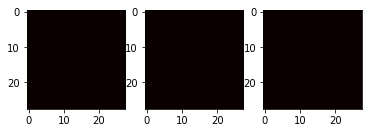

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.435186505317688, dimming (predicted): 0.48022758960723877


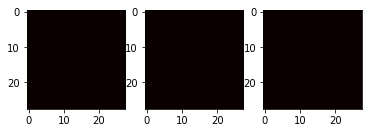

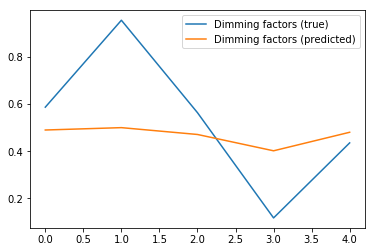

Current loss: 0.024072198197245598
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.039472877979278564, dimming (predicted): 0.11511886119842529


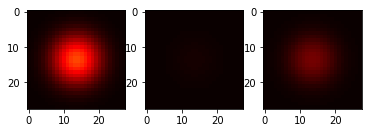

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2867959141731262, dimming (predicted): 0.34806931018829346


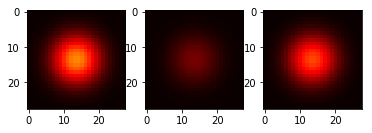

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.27153152227401733, dimming (predicted): 0.13948404788970947


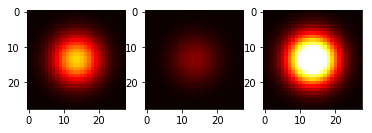

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19532448053359985, dimming (predicted): 0.1699965000152588


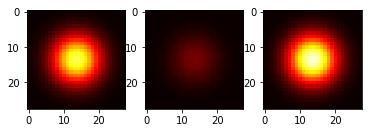

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7315388321876526, dimming (predicted): 0.7827908992767334


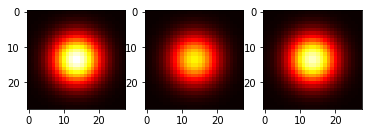

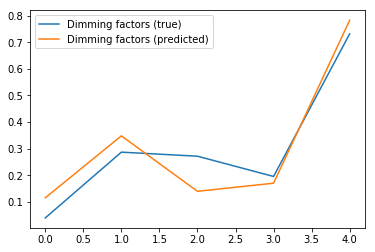

Current loss: 0.01686762645840645
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8118553757667542, dimming (predicted): 0.6917737722396851


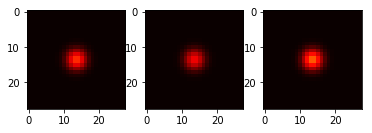

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3306366205215454, dimming (predicted): 0.14658403396606445


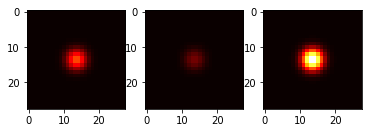

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8809913992881775, dimming (predicted): 0.7110300064086914


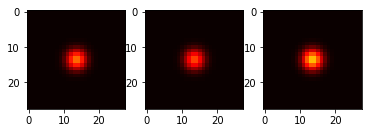

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5676640868186951, dimming (predicted): 0.4281172752380371


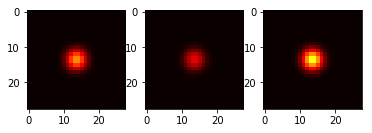

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6616401672363281, dimming (predicted): 0.5241974592208862


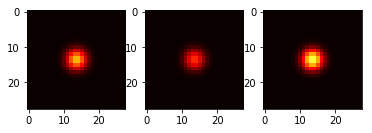

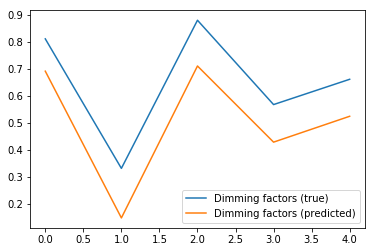

Current loss: 0.041083987802267075
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.369210422039032, dimming (predicted): 0.3555469512939453


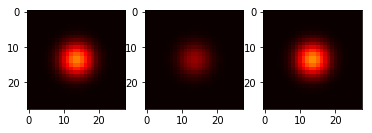

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.0722571611404419, dimming (predicted): 0.007116436958312988


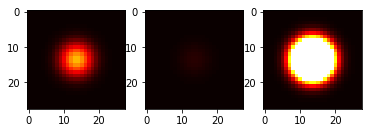

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5462952852249146, dimming (predicted): 0.6317553520202637


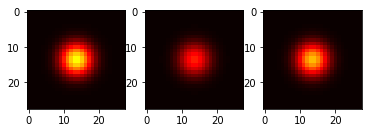

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8269989490509033, dimming (predicted): 0.840246319770813


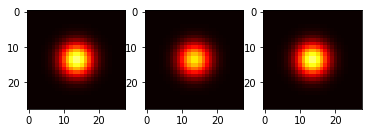

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7002629637718201, dimming (predicted): 0.7576256990432739


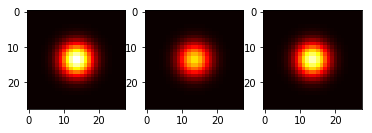

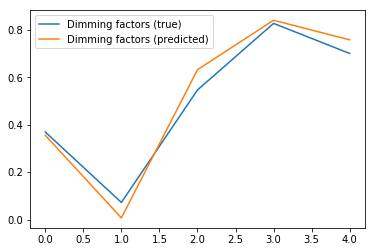

Current loss: 0.024422938004136086
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9426236152648926, dimming (predicted): 0.8301025629043579


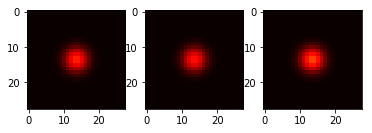

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4991987347602844, dimming (predicted): 0.5003153085708618


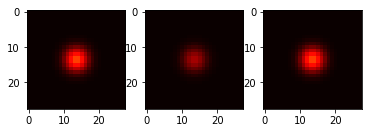

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5598940849304199, dimming (predicted): 0.576819896697998


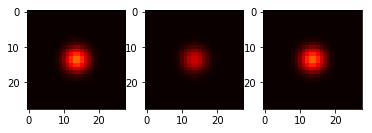

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6914114356040955, dimming (predicted): 0.6423901319503784


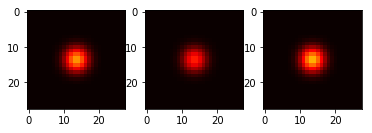

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.25716274976730347, dimming (predicted): 0.2144482135772705


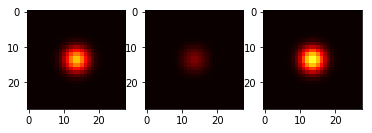

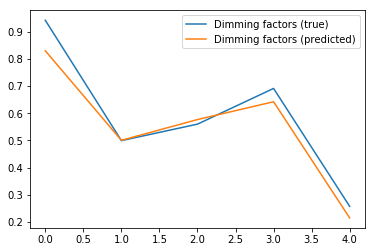

Current loss: 0.01881328970193863
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6212661266326904, dimming (predicted): 0.393926739692688


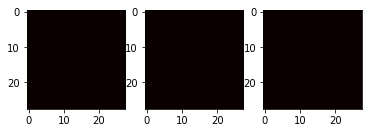

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5663802623748779, dimming (predicted): 0.3550468683242798


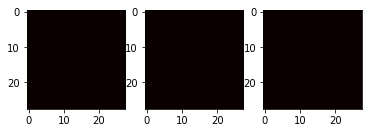

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7802597880363464, dimming (predicted): 0.3820207118988037


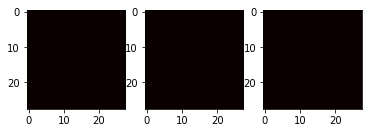

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6071836352348328, dimming (predicted): 0.4136974811553955


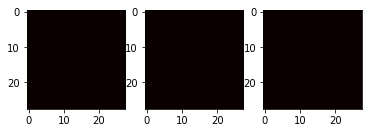

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3979913592338562, dimming (predicted): 0.3612980842590332


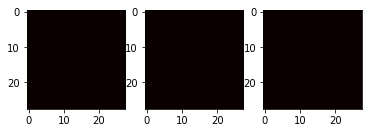

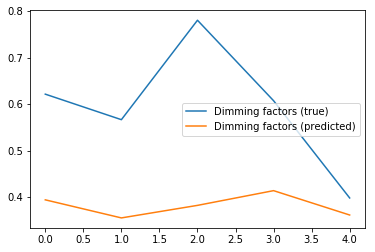

Current loss: 0.023543529212474823
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3044016361236572, dimming (predicted): 0.3639957904815674


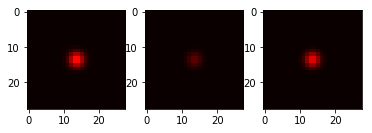

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21846580505371094, dimming (predicted): 0.27234137058258057


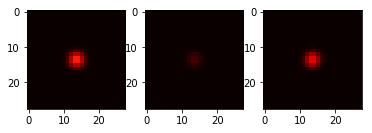

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8259619474411011, dimming (predicted): 0.8044922351837158


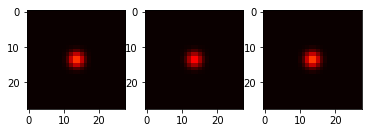

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.13700586557388306, dimming (predicted): 0.19652223587036133


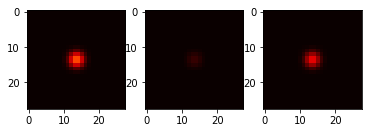

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3202136158943176, dimming (predicted): 0.4447282552719116


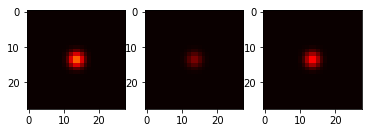

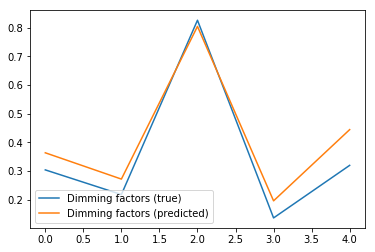

Current loss: 0.00343806273303926
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7881565690040588, dimming (predicted): 0.8334729671478271


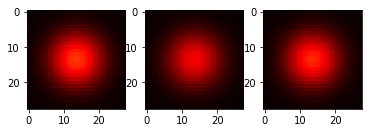

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3499946594238281, dimming (predicted): 0.32425999641418457


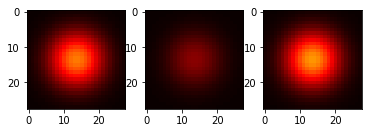

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.089863121509552, dimming (predicted): 0.09538090229034424


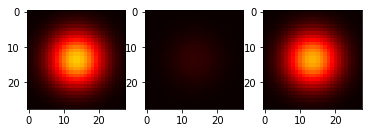

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.14996403455734253, dimming (predicted): 0.11256670951843262


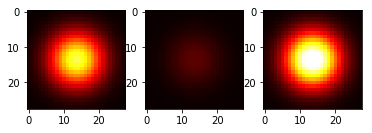

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1510767936706543, dimming (predicted): 0.1903325319290161


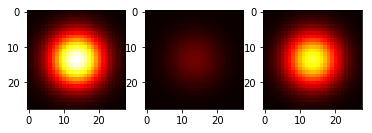

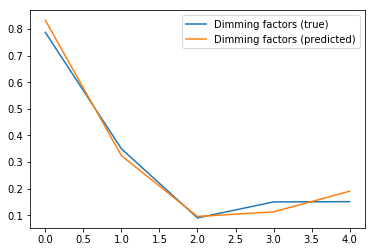

Current loss: 0.0040355464443564415
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5904250741004944, dimming (predicted): 0.6370847225189209


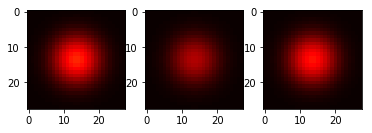

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9375190734863281, dimming (predicted): 0.8703532218933105


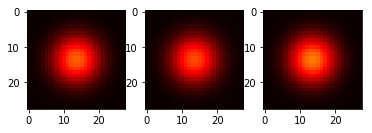

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6791693568229675, dimming (predicted): 0.6618280410766602


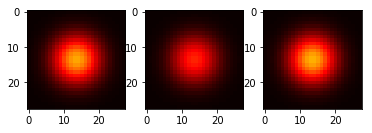

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07853919267654419, dimming (predicted): 0.13107037544250488


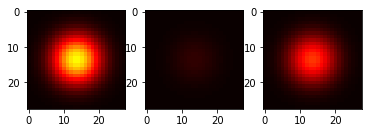

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4671674370765686, dimming (predicted): 0.47238457202911377


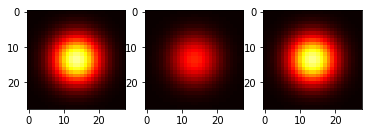

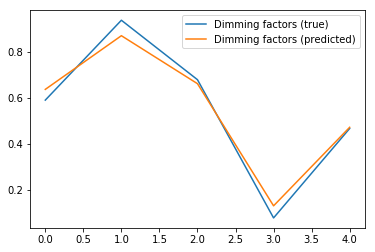

Current loss: 0.005921350792050362
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.06467914581298828, dimming (predicted): 0.0029144287109375


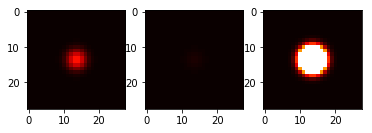

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8845107555389404, dimming (predicted): 0.7553608417510986


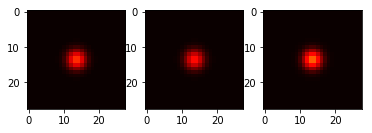

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5584465861320496, dimming (predicted): 0.5946990251541138


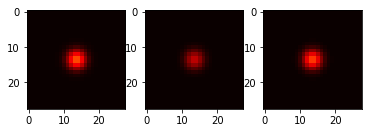

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.18872016668319702, dimming (predicted): 0.24943101406097412


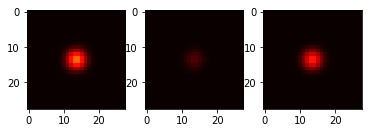

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3641379475593567, dimming (predicted): 0.45653748512268066


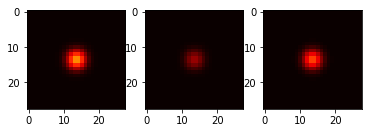

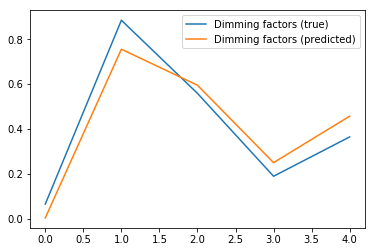

Current loss: 0.05286361277103424
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4116194248199463, dimming (predicted): 0.4761279821395874


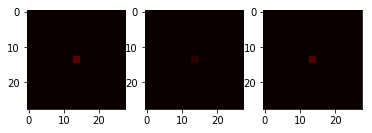

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19796669483184814, dimming (predicted): 0.4241420030593872


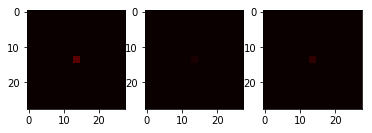

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21814066171646118, dimming (predicted): 0.39346301555633545


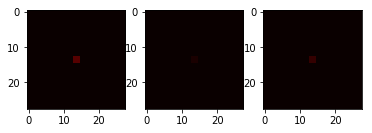

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8978665471076965, dimming (predicted): 0.5121966600418091


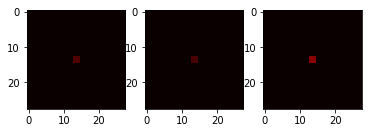

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9044134616851807, dimming (predicted): 0.5611234903335571


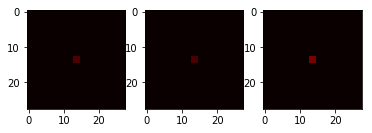

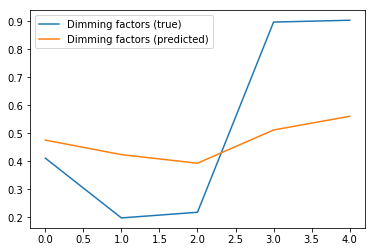

Current loss: 0.006039667874574661
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2124287486076355, dimming (predicted): 0.27130186557769775


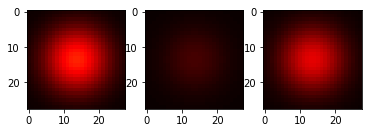

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2253204584121704, dimming (predicted): 0.34172523021698


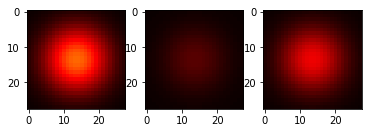

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8866317272186279, dimming (predicted): 0.9129488468170166


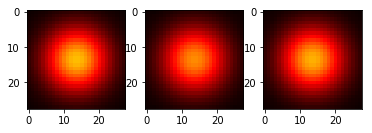

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.08206069469451904, dimming (predicted): 0.03968966007232666


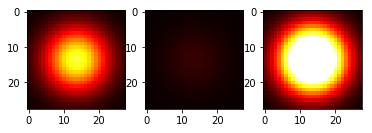

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5219753384590149, dimming (predicted): 0.5616207122802734


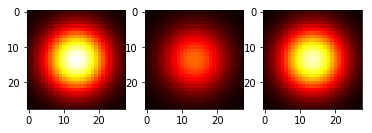

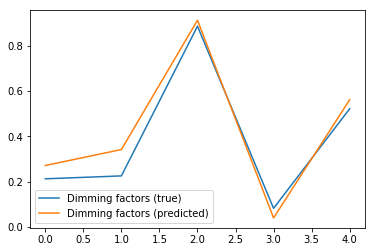

Current loss: 0.027950739488005638
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.015594780445098877, dimming (predicted): 0.003564000129699707


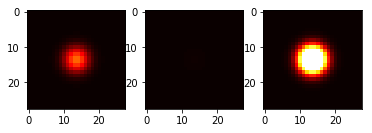

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.255426287651062, dimming (predicted): 0.462155818939209


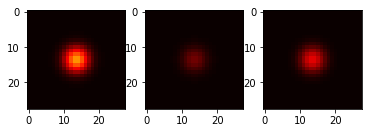

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5276044607162476, dimming (predicted): 0.6608657836914062


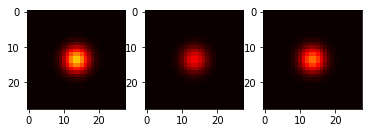

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4907582402229309, dimming (predicted): 0.6571511030197144


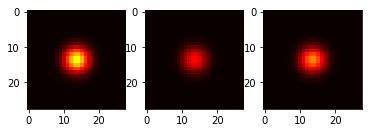

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.11551463603973389, dimming (predicted): 0.16268014907836914


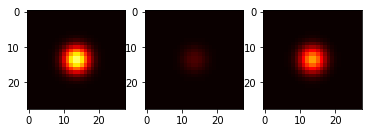

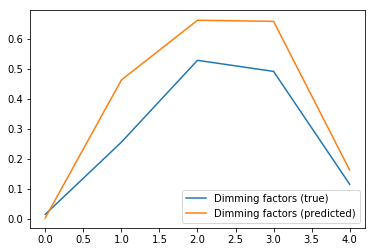

Current loss: 0.015640350058674812
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.38502180576324463, dimming (predicted): 0.28778040409088135


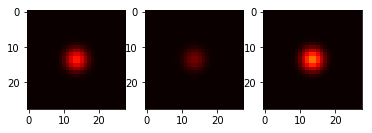

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.878754734992981, dimming (predicted): 0.7736694812774658


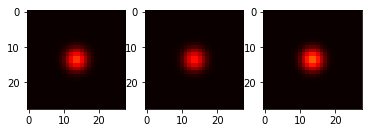

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.902812659740448, dimming (predicted): 0.8183884620666504


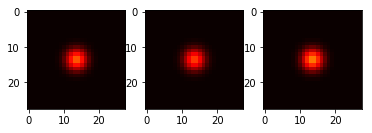

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7285252809524536, dimming (predicted): 0.6295708417892456


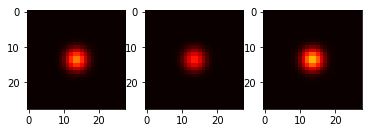

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.33154046535491943, dimming (predicted): 0.3501772880554199


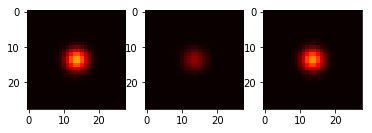

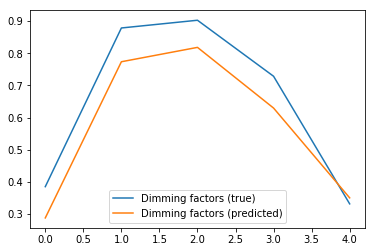

Current loss: 0.0034622405655682087
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9936102032661438, dimming (predicted): 0.9191457033157349


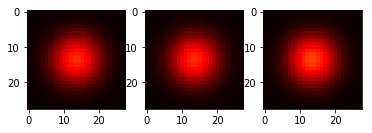

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6643698215484619, dimming (predicted): 0.6976885795593262


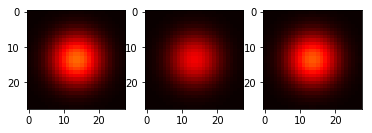

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.027194082736968994, dimming (predicted): 0.08158731460571289


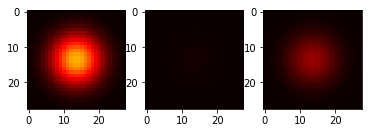

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.01985180377960205, dimming (predicted): 0.13415098190307617


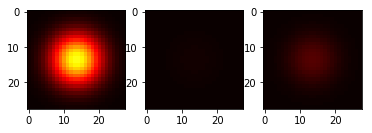

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5814892053604126, dimming (predicted): 0.6320525407791138


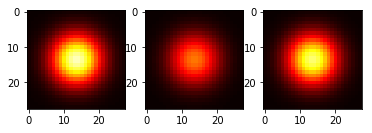

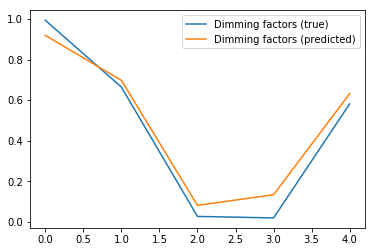

Current loss: 0.003534367075189948
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7577758431434631, dimming (predicted): 0.7817323207855225


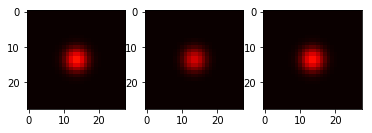

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.395196795463562, dimming (predicted): 0.4294320344924927


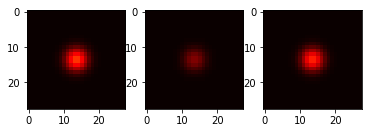

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9101466536521912, dimming (predicted): 0.8418251276016235


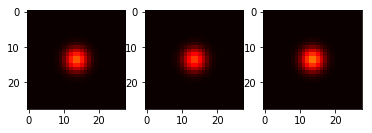

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8406760692596436, dimming (predicted): 0.8204928636550903


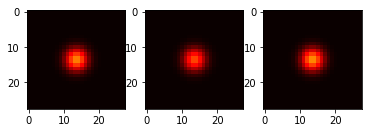

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6830430626869202, dimming (predicted): 0.6606994867324829


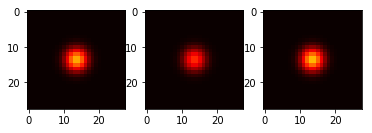

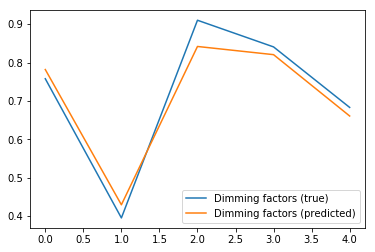

Current loss: 0.0037072929553687572
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9368793368339539, dimming (predicted): 0.8130556344985962


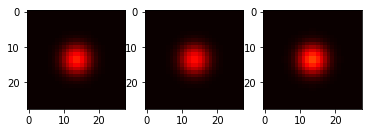

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7999205589294434, dimming (predicted): 0.7331514358520508


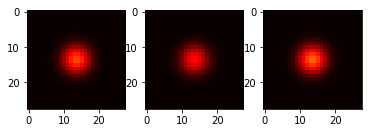

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.41999268531799316, dimming (predicted): 0.38509511947631836


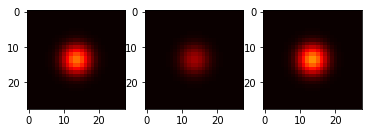

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1943184733390808, dimming (predicted): 0.07494246959686279


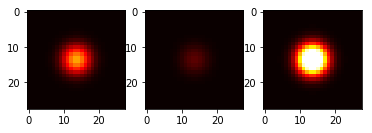

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.0781593918800354, dimming (predicted): 0.07419919967651367


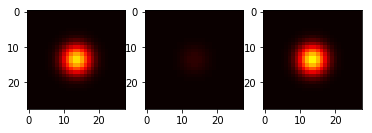

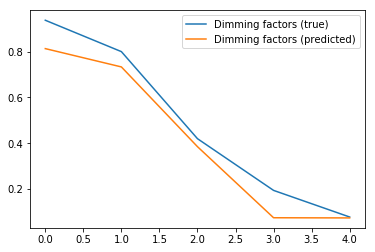

Current loss: 0.014359142631292343
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9712094664573669, dimming (predicted): 0.7292879819869995


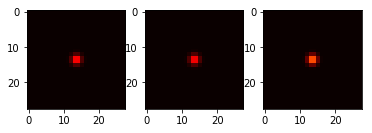

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6799340844154358, dimming (predicted): 0.49822986125946045


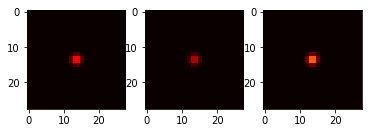

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2701849937438965, dimming (predicted): 0.24262011051177979


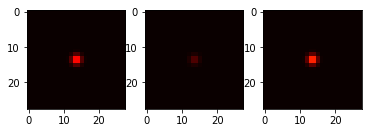

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9166263341903687, dimming (predicted): 0.7565834522247314


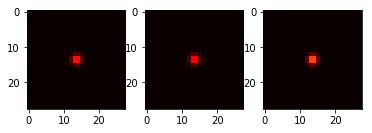

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3613017201423645, dimming (predicted): 0.3369133472442627


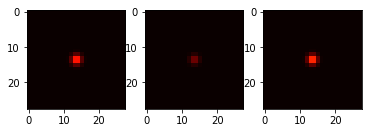

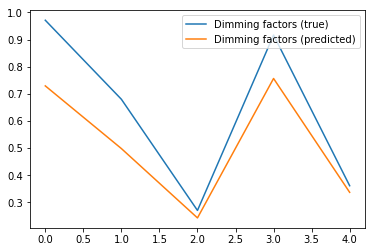

Current loss: 0.008856447413563728
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4026075601577759, dimming (predicted): 0.4585137367248535


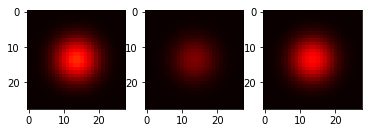

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6112930178642273, dimming (predicted): 0.7581616640090942


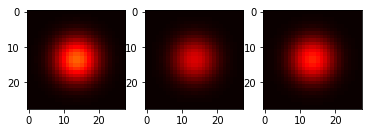

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5546149015426636, dimming (predicted): 0.5856274366378784


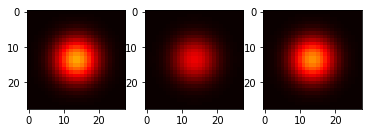

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6975691318511963, dimming (predicted): 0.8194338083267212


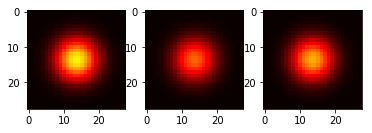

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.114560067653656, dimming (predicted): -0.002092599868774414


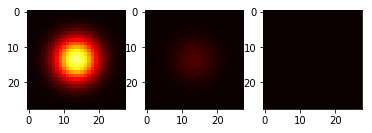

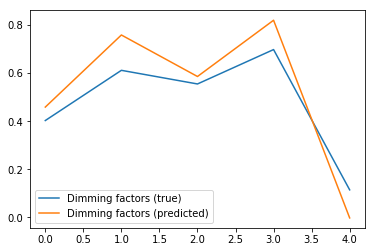

Current loss: 0.047599758952856064
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.864267110824585, dimming (predicted): 0.4758046865463257


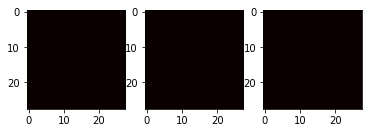

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10089010000228882, dimming (predicted): 0.5336740016937256


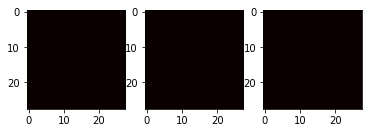

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8060197234153748, dimming (predicted): 0.41179752349853516


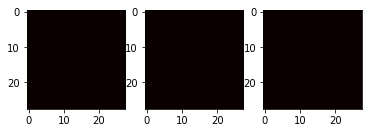

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9165986776351929, dimming (predicted): 0.5170060396194458


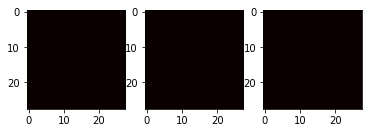

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.011753261089324951, dimming (predicted): 0.3104323148727417


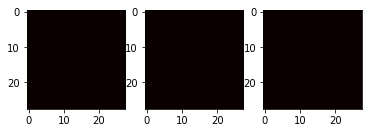

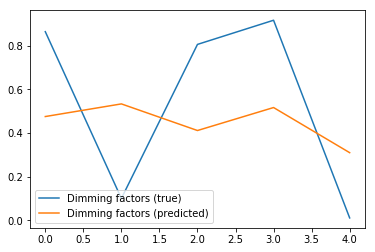

Current loss: 0.005347990896552801
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6481660604476929, dimming (predicted): 0.7092957496643066


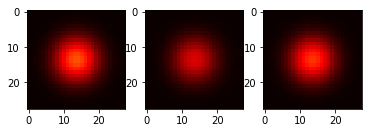

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8997759222984314, dimming (predicted): 0.8668524026870728


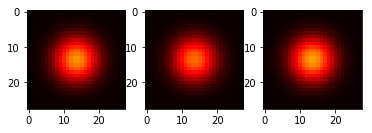

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07377541065216064, dimming (predicted): 0.14263713359832764


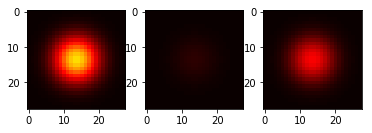

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5391639471054077, dimming (predicted): 0.539284348487854


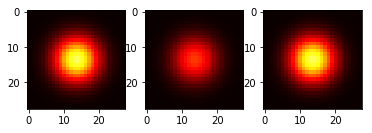

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8833234906196594, dimming (predicted): 0.8683222532272339


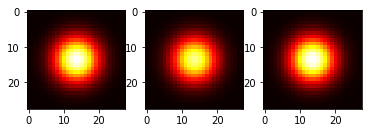

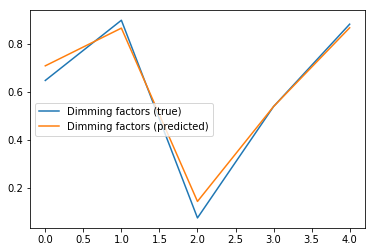

Current loss: 0.01823912002146244
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10963398218154907, dimming (predicted): 0.10052728652954102


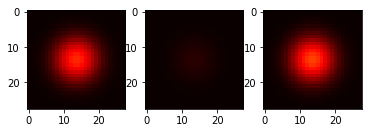

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.15460336208343506, dimming (predicted): 0.1934722661972046


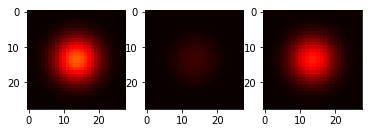

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7891982197761536, dimming (predicted): 0.8172565698623657


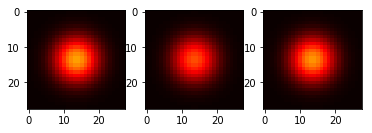

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07656538486480713, dimming (predicted): 0.0989217758178711


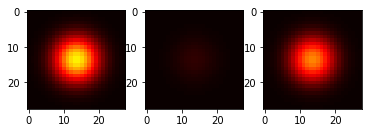

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5640674233436584, dimming (predicted): 0.5756198167800903


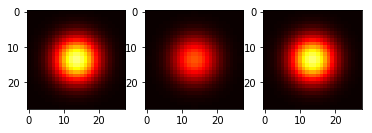

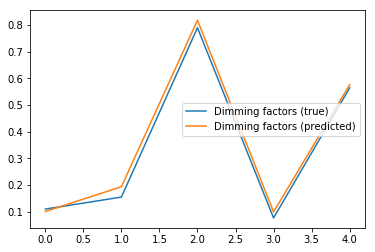

Current loss: 0.01210794411599636
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21026766300201416, dimming (predicted): 0.15225756168365479


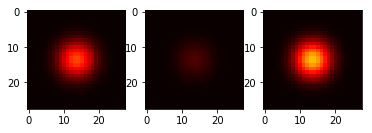

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.720795214176178, dimming (predicted): 0.6799217462539673


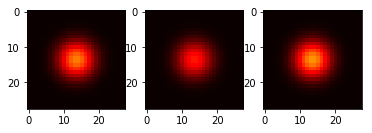

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.33635038137435913, dimming (predicted): 0.17911577224731445


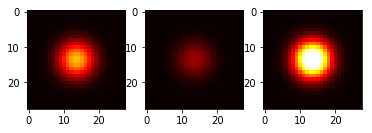

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9735782742500305, dimming (predicted): 0.8132810592651367


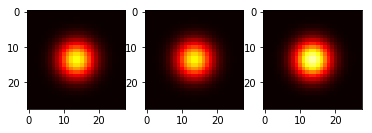

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.14553606510162354, dimming (predicted): 0.15427851676940918


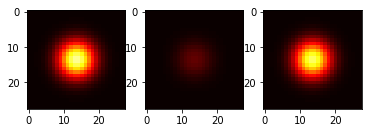

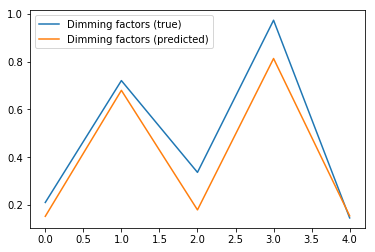

Current loss: 0.0049613844603300095
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5589843392372131, dimming (predicted): 0.5687160491943359


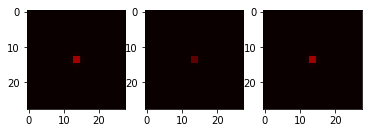

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2364131212234497, dimming (predicted): 0.31977009773254395


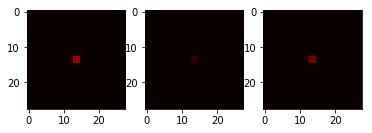

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5126423239707947, dimming (predicted): 0.474173903465271


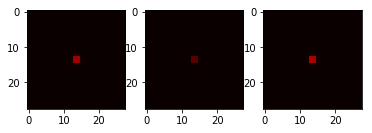

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.35202962160110474, dimming (predicted): 0.2650878429412842


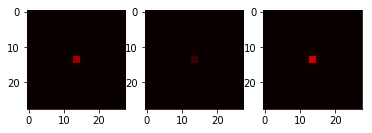

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19152921438217163, dimming (predicted): 0.15919458866119385


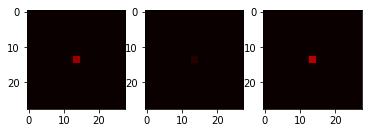

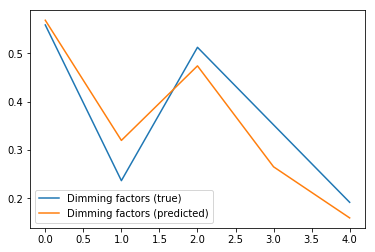

Current loss: 0.017728092148900032
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9610254168510437, dimming (predicted): 0.8643923997879028


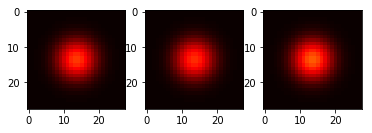

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20003622770309448, dimming (predicted): 0.16874969005584717


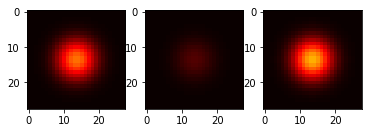

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.09528505802154541, dimming (predicted): 0.14979493618011475


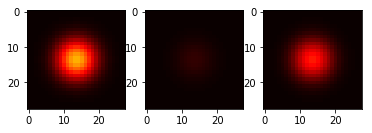

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4562949538230896, dimming (predicted): 0.5351420640945435


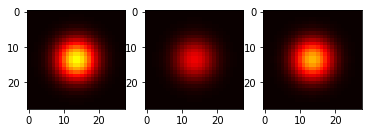

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6490697860717773, dimming (predicted): 0.7076253890991211


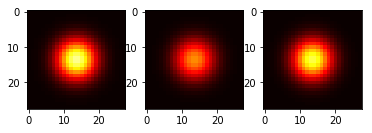

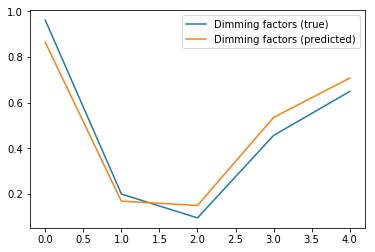

Current loss: 0.008206358179450035
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6950640678405762, dimming (predicted): 0.792263388633728


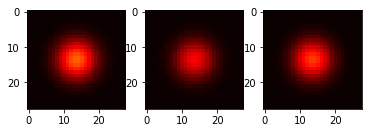

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21764707565307617, dimming (predicted): 0.26895296573638916


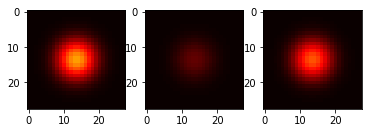

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5597892999649048, dimming (predicted): 0.558700680732727


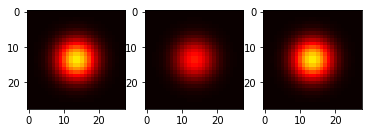

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5943532586097717, dimming (predicted): 0.6200231313705444


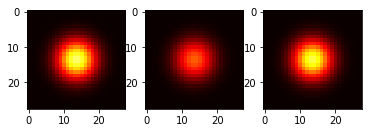

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4663100838661194, dimming (predicted): 0.4430147409439087


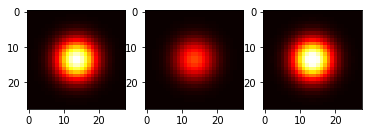

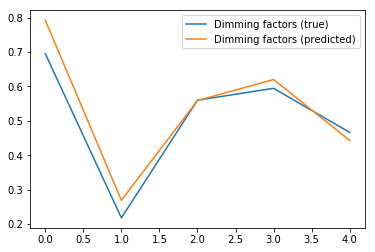

Current loss: 0.016717802733182907
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7343827486038208, dimming (predicted): 0.731657862663269


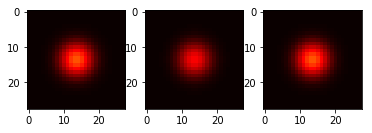

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.715244472026825, dimming (predicted): 0.7125465869903564


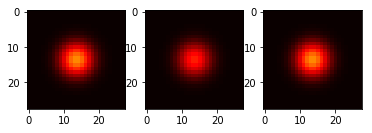

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8009555339813232, dimming (predicted): 0.7817860841751099


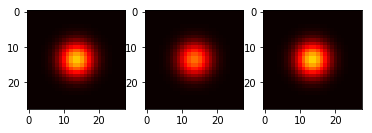

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2943021059036255, dimming (predicted): 0.3130338191986084


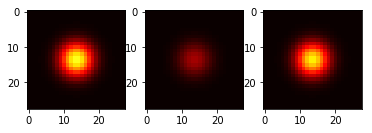

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6698223948478699, dimming (predicted): 0.7338918447494507


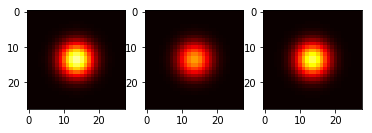

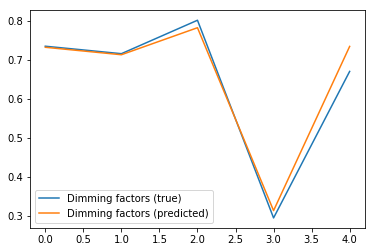

Current loss: 0.03070896863937378
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.55092853307724, dimming (predicted): 0.33754920959472656


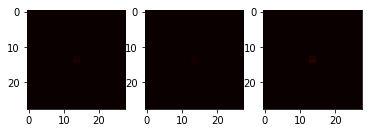

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.0044553279876708984, dimming (predicted): 0.35894250869750977


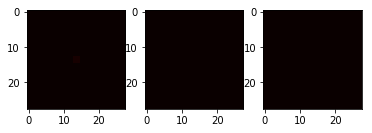

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3023463487625122, dimming (predicted): 0.38073980808258057


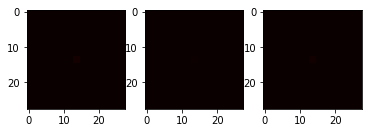

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7422433495521545, dimming (predicted): 0.40594911575317383


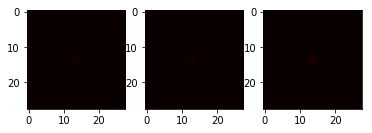

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9037694334983826, dimming (predicted): 0.3726881742477417


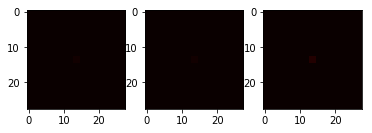

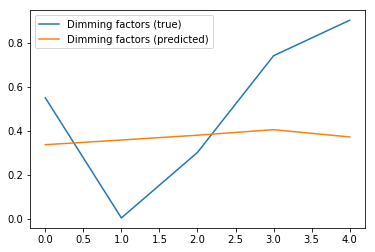

Current loss: 0.01841639168560505
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7979395985603333, dimming (predicted): 0.7778937816619873


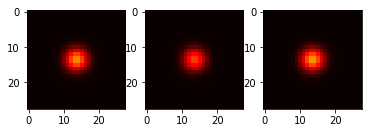

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4579032063484192, dimming (predicted): 0.45172345638275146


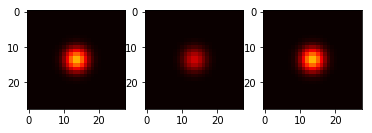

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.49148398637771606, dimming (predicted): 0.43991994857788086


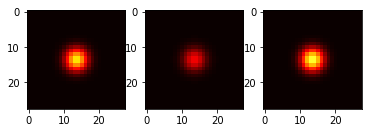

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.951185405254364, dimming (predicted): 0.882152795791626


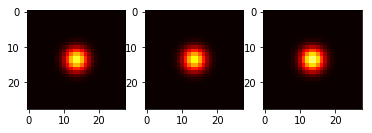

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.511037290096283, dimming (predicted): 0.5879148244857788


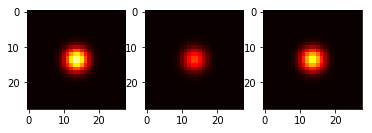

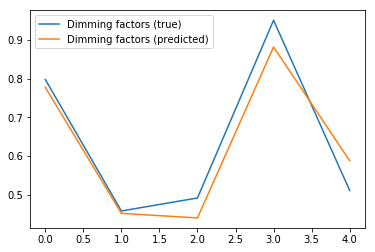

Current loss: 0.018582940101623535
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.38040024042129517, dimming (predicted): 0.3637181520462036


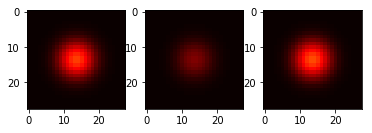

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8885942697525024, dimming (predicted): 0.8746848106384277


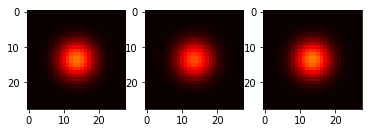

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.336456835269928, dimming (predicted): 0.25727081298828125


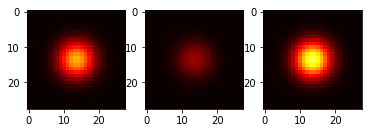

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.08554577827453613, dimming (predicted): 0.0754631757736206


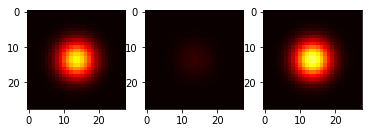

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5241997241973877, dimming (predicted): 0.41799962520599365


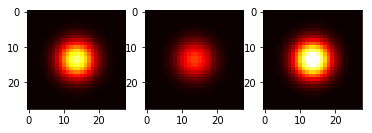

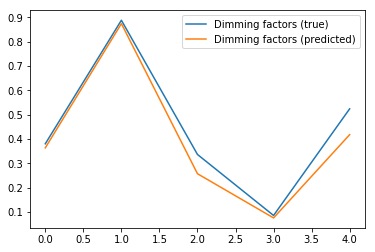

Current loss: 0.003745048539713025
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.27620333433151245, dimming (predicted): 0.20823395252227783


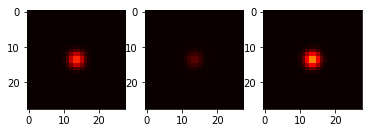

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6167699098587036, dimming (predicted): 0.6091781854629517


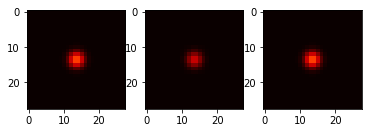

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4275408983230591, dimming (predicted): 0.46143972873687744


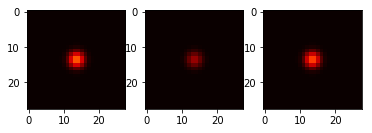

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6209747195243835, dimming (predicted): 0.6112061738967896


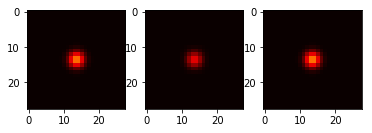

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8148323893547058, dimming (predicted): 0.7704068422317505


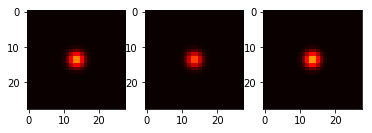

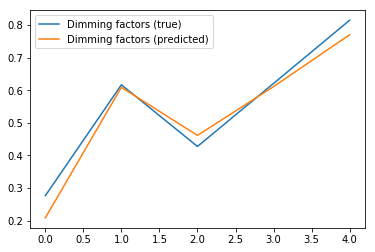

Current loss: 0.003482652362436056
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6610239148139954, dimming (predicted): 0.6831114292144775


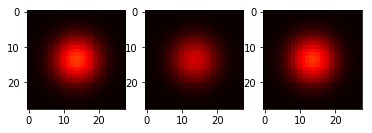

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2541402578353882, dimming (predicted): 0.3194420337677002


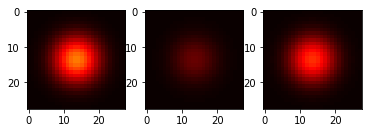

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8316718935966492, dimming (predicted): 0.864454984664917


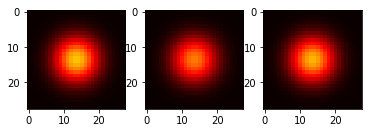

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.125616192817688, dimming (predicted): 0.19654881954193115


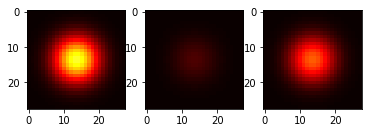

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8238054513931274, dimming (predicted): 0.878974437713623


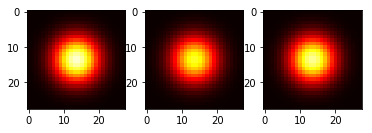

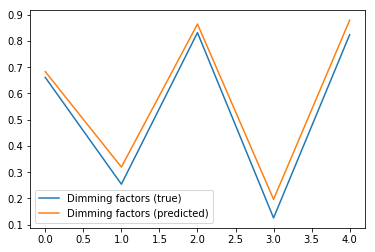

Current loss: 0.04248739033937454
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9450801610946655, dimming (predicted): 0.9162582159042358


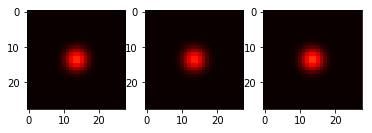

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4514644742012024, dimming (predicted): 0.3841087818145752


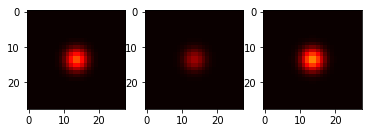

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7711628675460815, dimming (predicted): 0.7574852705001831


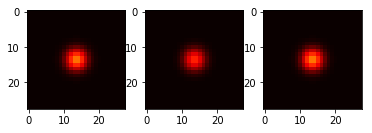

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6461149454116821, dimming (predicted): 0.6804083585739136


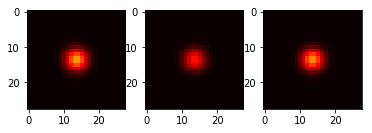

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.816047191619873, dimming (predicted): 0.813010573387146


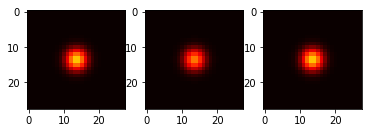

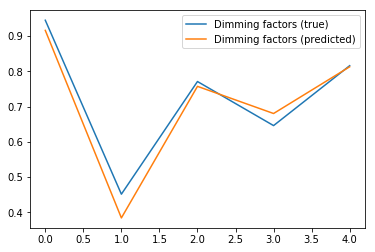

Current loss: 0.0035286962520331144
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4867698550224304, dimming (predicted): 0.4155154228210449


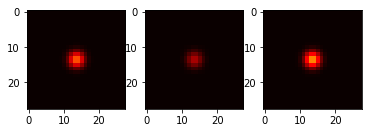

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.401572048664093, dimming (predicted): 0.5136697292327881


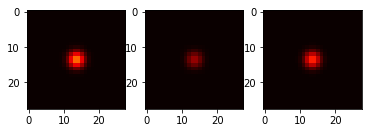

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.25234633684158325, dimming (predicted): 0.3317469358444214


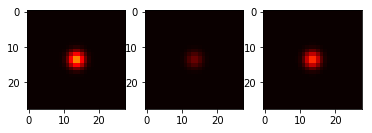

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9856241941452026, dimming (predicted): 0.8951718807220459


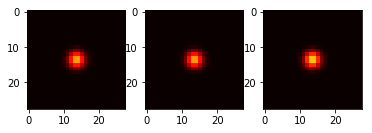

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21225488185882568, dimming (predicted): 0.3064655065536499


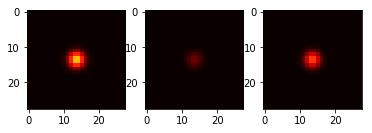

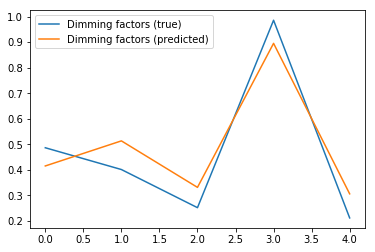

Current loss: 0.00817798264324665
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5388219952583313, dimming (predicted): 0.5779910087585449


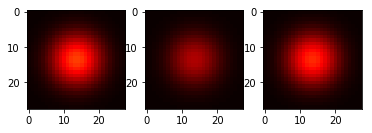

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9484100341796875, dimming (predicted): 0.8721621036529541


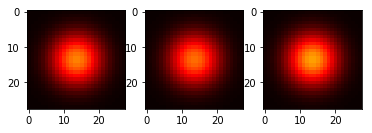

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3643677830696106, dimming (predicted): 0.37715280055999756


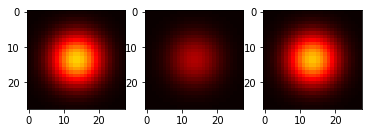

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9848403930664062, dimming (predicted): 0.8551957607269287


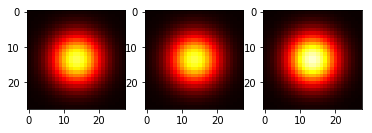

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3624088764190674, dimming (predicted): 0.4731602668762207


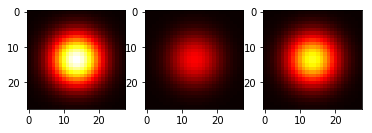

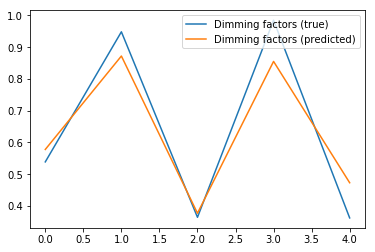

Current loss: 0.0721387267112732
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.47335803508758545, dimming (predicted): 0.43136727809906006


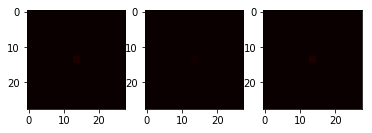

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5965168476104736, dimming (predicted): 0.6713128089904785


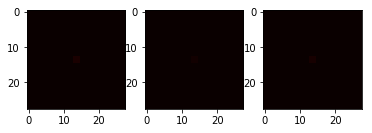

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2290048599243164, dimming (predicted): 0.6898149251937866


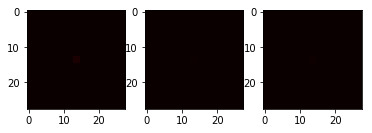

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4765755534172058, dimming (predicted): 0.4973561763763428


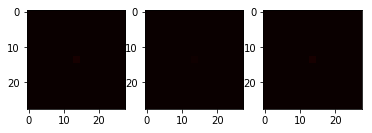

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4506089687347412, dimming (predicted): 0.5352009534835815


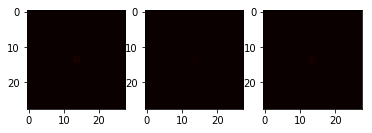

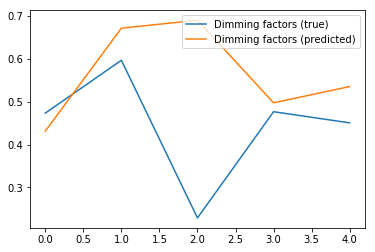

Current loss: 0.028343407437205315
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.39473289251327515, dimming (predicted): 0.3022177219390869


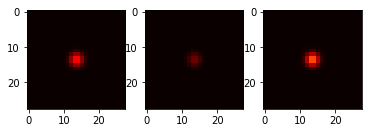

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4442804455757141, dimming (predicted): 0.34975147247314453


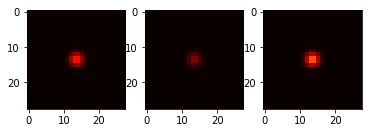

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8006196618080139, dimming (predicted): 0.7781133651733398


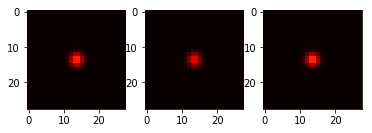

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6723906397819519, dimming (predicted): 0.718012809753418


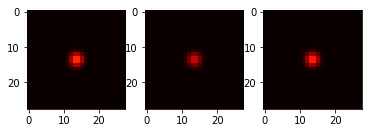

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7724919319152832, dimming (predicted): 0.7702662944793701


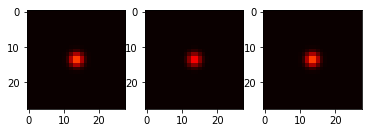

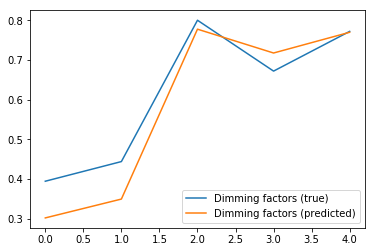

Current loss: 0.005368335172533989
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.016872525215148926, dimming (predicted): 0.11594760417938232


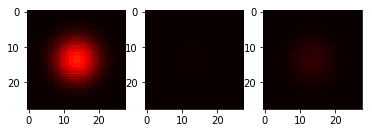

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7849770784378052, dimming (predicted): 0.7331699132919312


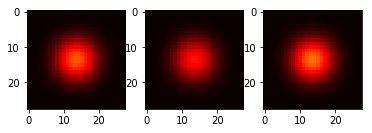

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9391985535621643, dimming (predicted): 0.8574514389038086


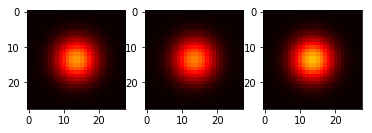

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4044269323348999, dimming (predicted): 0.37021636962890625


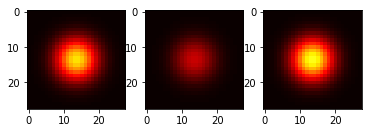

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.12580764293670654, dimming (predicted): 0.04450333118438721


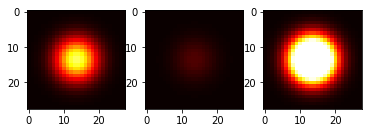

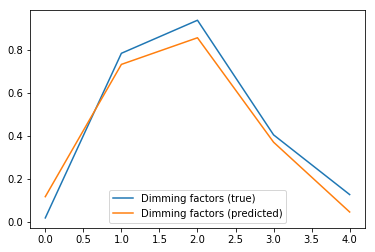

Current loss: 0.0023376899771392345
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3565292954444885, dimming (predicted): 0.31083571910858154


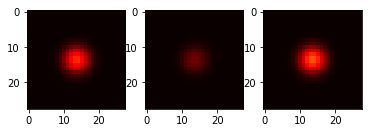

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8269898295402527, dimming (predicted): 0.7546768188476562


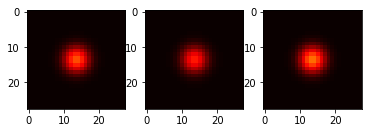

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.04746115207672119, dimming (predicted): 0.025853633880615234


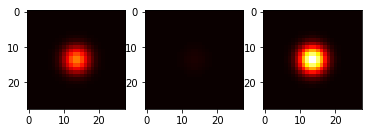

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2478708028793335, dimming (predicted): 0.23253631591796875


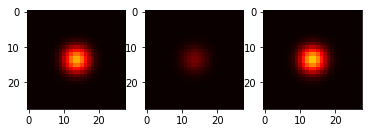

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6571937799453735, dimming (predicted): 0.6263251304626465


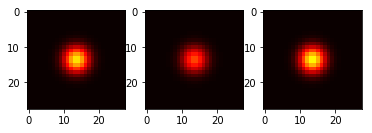

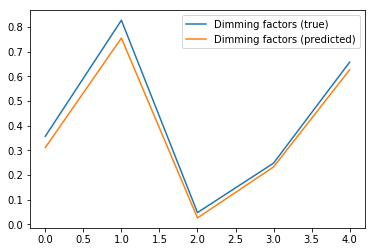

Current loss: 0.0029484136030077934
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4026530981063843, dimming (predicted): 0.41622185707092285


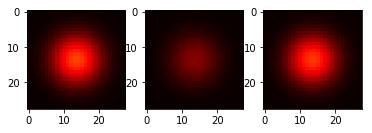

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20476239919662476, dimming (predicted): 0.13438355922698975


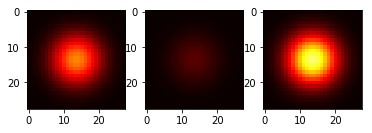

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.192737877368927, dimming (predicted): 0.23966872692108154


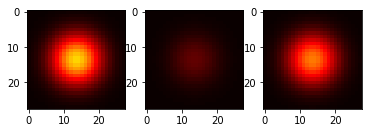

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.861276388168335, dimming (predicted): 0.886257529258728


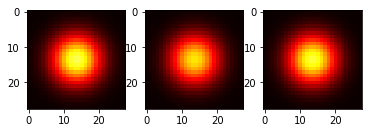

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.041859328746795654, dimming (predicted): 0.10872793197631836


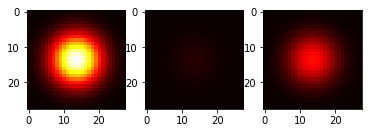

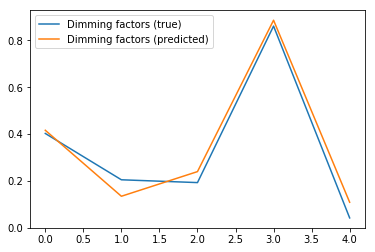

Current loss: 0.014818019233644009
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.28237903118133545, dimming (predicted): 0.26290154457092285


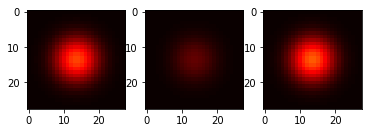

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2850043773651123, dimming (predicted): 0.22972893714904785


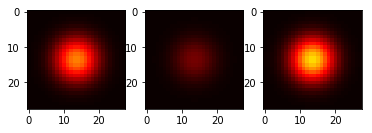

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3226205110549927, dimming (predicted): 0.2640327215194702


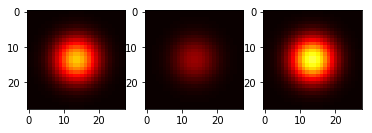

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42816591262817383, dimming (predicted): 0.4941995143890381


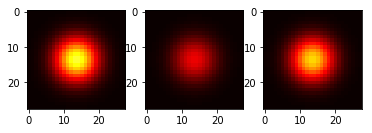

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.47987592220306396, dimming (predicted): 0.5050414800643921


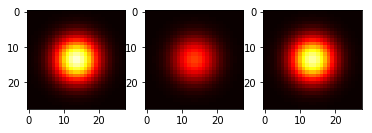

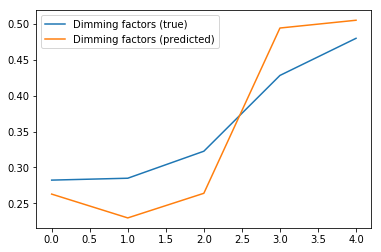

Current loss: 0.03896297141909599
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07888537645339966, dimming (predicted): 0.37684762477874756


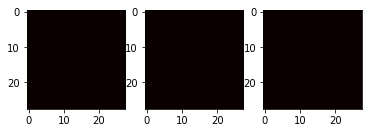

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6564604043960571, dimming (predicted): 0.47469305992126465


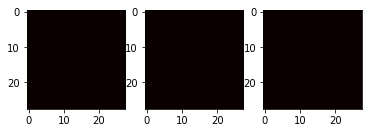

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07745975255966187, dimming (predicted): 0.4024125337600708


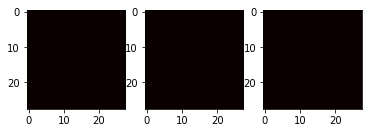

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7856796979904175, dimming (predicted): 0.5132719278335571


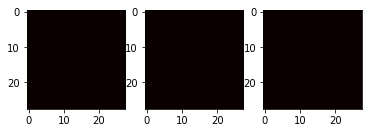

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.042843639850616455, dimming (predicted): 0.48424577713012695


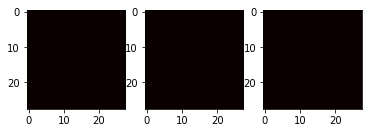

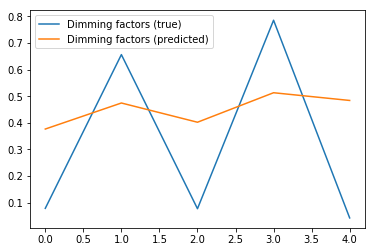

Current loss: 0.0021036150865256786
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.29348593950271606, dimming (predicted): 0.3257972002029419


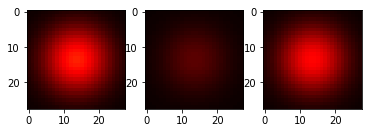

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8243856430053711, dimming (predicted): 0.8247559070587158


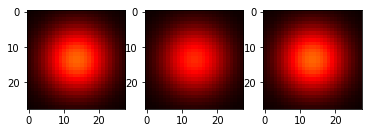

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10759371519088745, dimming (predicted): 0.1693408489227295


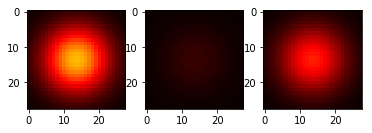

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9930729269981384, dimming (predicted): 0.9348962306976318


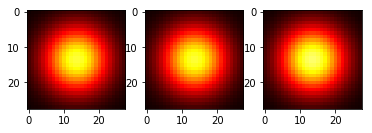

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.26988232135772705, dimming (predicted): 0.30493366718292236


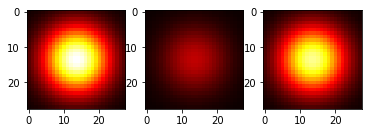

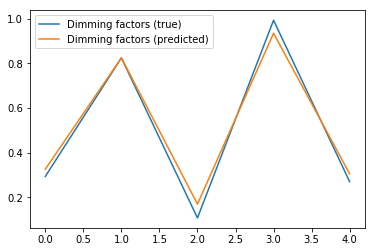

Current loss: 0.0037154643796384335
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7491211295127869, dimming (predicted): 0.7283345460891724


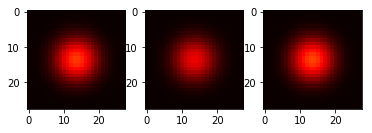

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7819855809211731, dimming (predicted): 0.7290828227996826


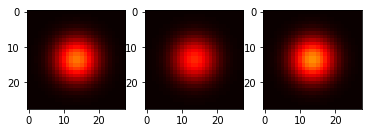

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7417615652084351, dimming (predicted): 0.6923576593399048


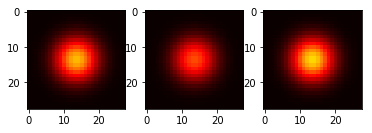

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16660088300704956, dimming (predicted): 0.12025749683380127


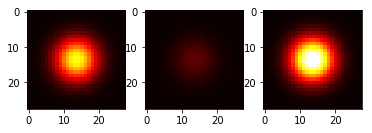

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20140540599822998, dimming (predicted): 0.18434321880340576


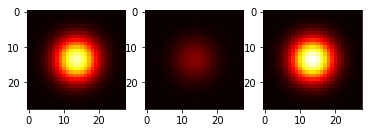

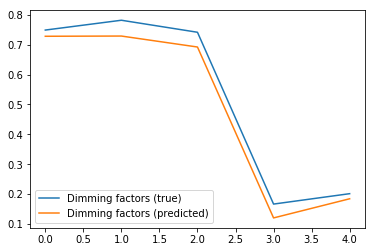

Current loss: 0.036613643169403076
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9305126667022705, dimming (predicted): 0.8077678680419922


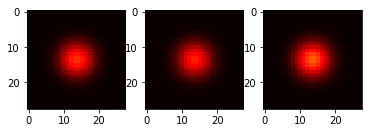

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.016061842441558838, dimming (predicted): 0.03807854652404785


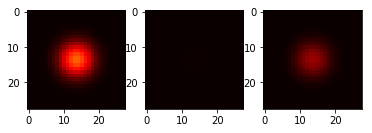

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4736632704734802, dimming (predicted): 0.434684157371521


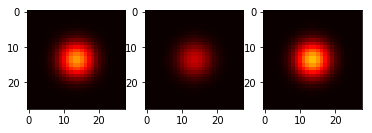

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.43063777685165405, dimming (predicted): 0.3342876434326172


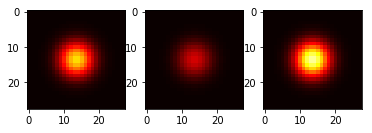

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.32542216777801514, dimming (predicted): 0.27906644344329834


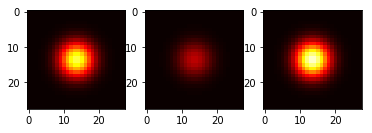

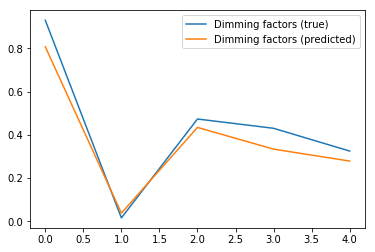

Current loss: 0.00675708195194602
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9808021783828735, dimming (predicted): 0.895316481590271


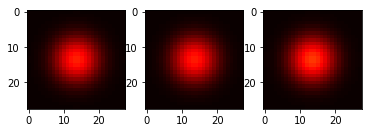

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.22089600563049316, dimming (predicted): 0.2277367115020752


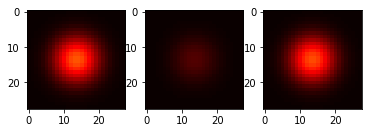

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19614076614379883, dimming (predicted): 0.23035764694213867


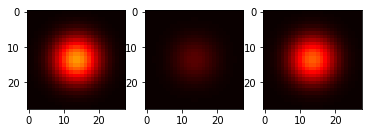

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.23308920860290527, dimming (predicted): 0.250102162361145


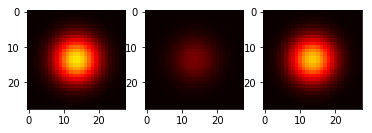

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9179052710533142, dimming (predicted): 0.8907827138900757


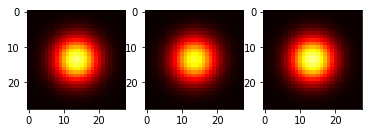

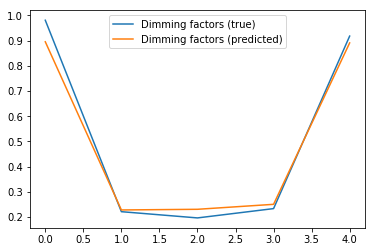

Current loss: 0.002080638660117984
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8505516648292542, dimming (predicted): 0.8900666236877441


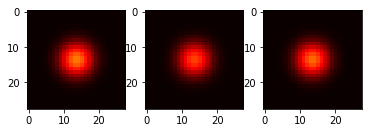

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.19861918687820435, dimming (predicted): 0.21202504634857178


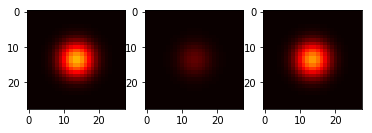

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4226765036582947, dimming (predicted): 0.3654426336288452


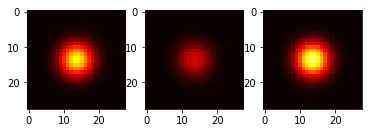

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4575765132904053, dimming (predicted): 0.5109817981719971


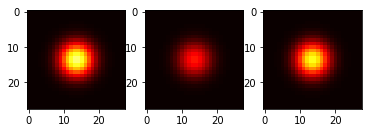

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5619829297065735, dimming (predicted): 0.5494719743728638


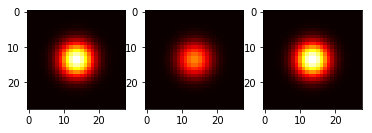

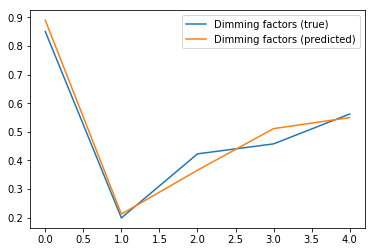

Current loss: 0.003929773345589638
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.47771888971328735, dimming (predicted): 0.358673095703125


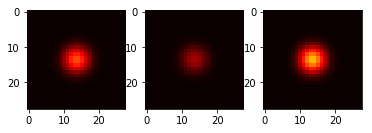

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16074532270431519, dimming (predicted): 0.11357903480529785


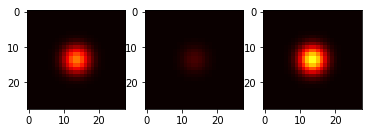

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9355936050415039, dimming (predicted): 0.879095196723938


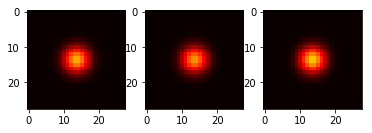

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9086742997169495, dimming (predicted): 0.8160178661346436


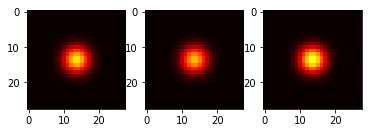

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9799624681472778, dimming (predicted): 0.896365761756897


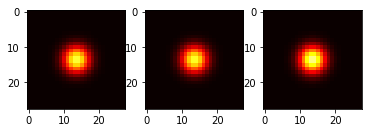

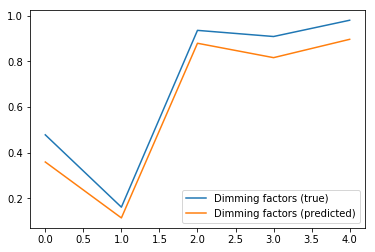

Current loss: 0.06238909065723419
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7106285095214844, dimming (predicted): 0.7104029655456543


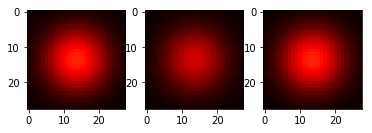

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6763393878936768, dimming (predicted): 0.7334266901016235


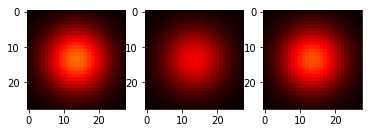

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5277988910675049, dimming (predicted): 0.5808449983596802


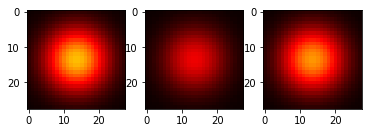

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4504390358924866, dimming (predicted): 0.4679694175720215


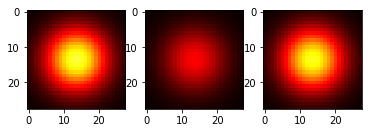

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10796546936035156, dimming (predicted): 0.03126120567321777


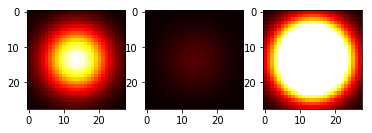

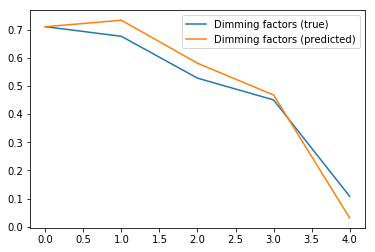

Current loss: 0.004695217125117779
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9045084118843079, dimming (predicted): 0.8368809223175049


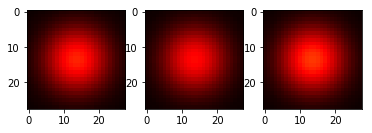

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7288419008255005, dimming (predicted): 0.6461619138717651


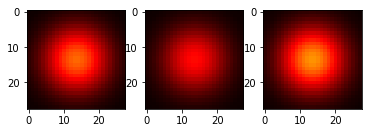

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.45248717069625854, dimming (predicted): 0.4556835889816284


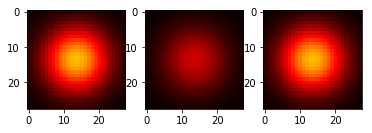

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.26030057668685913, dimming (predicted): 0.2709987163543701


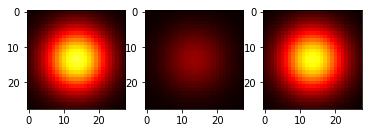

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9026051163673401, dimming (predicted): 0.8573161363601685


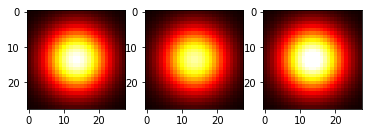

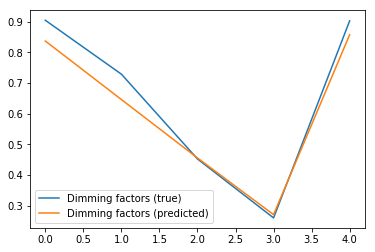

Current loss: 0.016143042594194412
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6436507105827332, dimming (predicted): 0.7519170045852661


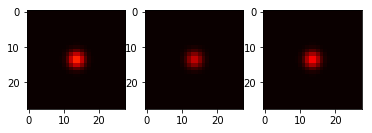

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.45874643325805664, dimming (predicted): 0.5029829740524292


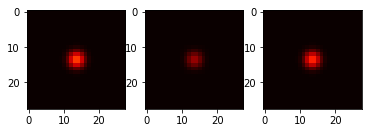

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42428404092788696, dimming (predicted): 0.43069934844970703


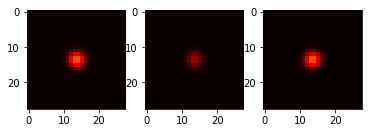

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.12209904193878174, dimming (predicted): 0.06987142562866211


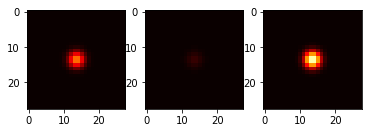

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20529770851135254, dimming (predicted): 0.1637887954711914


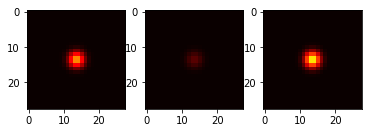

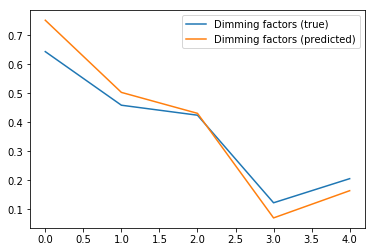

Current loss: 0.0023749652318656445
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9740445613861084, dimming (predicted): 0.8686695098876953


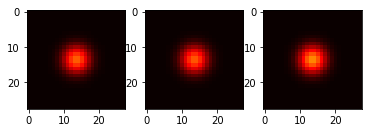

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.654229998588562, dimming (predicted): 0.6723216772079468


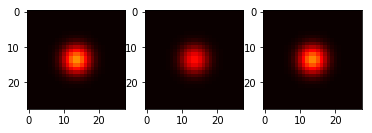

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8497881293296814, dimming (predicted): 0.8448535203933716


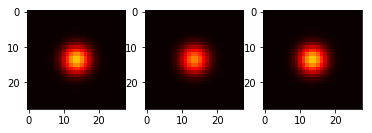

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5036935806274414, dimming (predicted): 0.5846009254455566


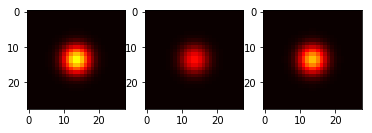

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2903541326522827, dimming (predicted): 0.34003210067749023


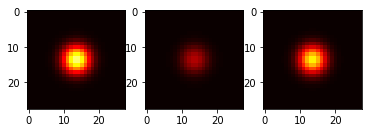

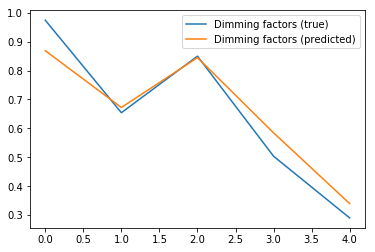

Current loss: 0.014780029654502869
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4530142545700073, dimming (predicted): 0.6610594987869263


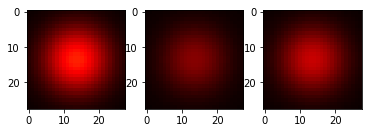

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6456616520881653, dimming (predicted): 0.7673987150192261


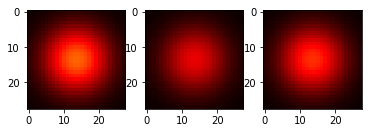

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.26444703340530396, dimming (predicted): 0.26461029052734375


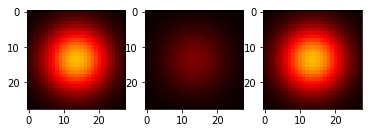

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.249531090259552, dimming (predicted): 0.3047884702682495


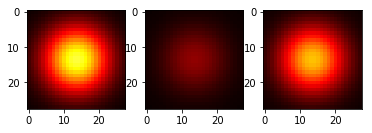

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.36044007539749146, dimming (predicted): 0.370871901512146


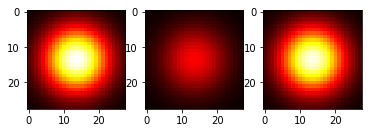

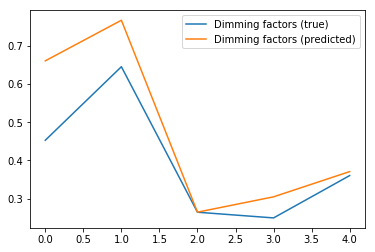

Current loss: 0.0015735088381916285
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5422969460487366, dimming (predicted): 0.46036338806152344


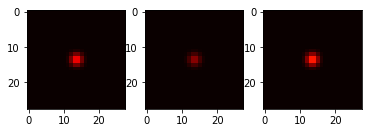

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.30439990758895874, dimming (predicted): 0.32230889797210693


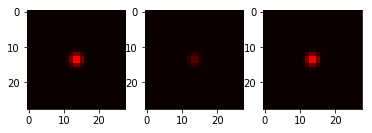

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2673676013946533, dimming (predicted): 0.25493061542510986


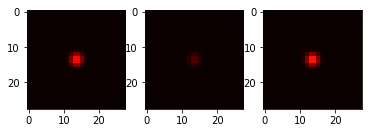

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9291630387306213, dimming (predicted): 0.8906005620956421


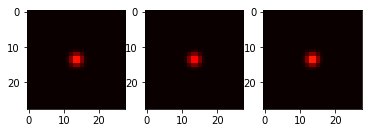

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3560182452201843, dimming (predicted): 0.3542102575302124


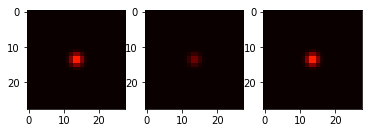

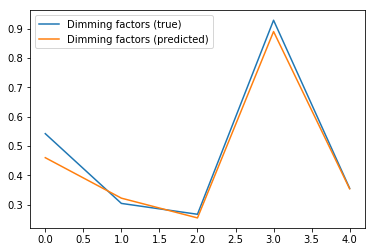

Current loss: 0.004138974007219076
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.46186012029647827, dimming (predicted): 0.4174424409866333


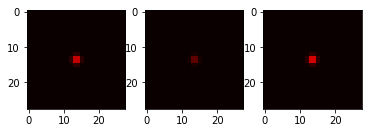

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7907474637031555, dimming (predicted): 0.6587660312652588


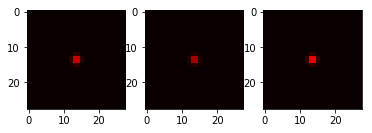

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.692529559135437, dimming (predicted): 0.6666821241378784


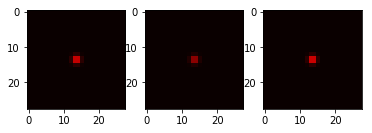

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9466773271560669, dimming (predicted): 0.8025740385055542


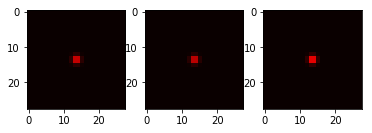

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.651172935962677, dimming (predicted): 0.6135090589523315


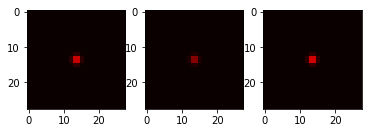

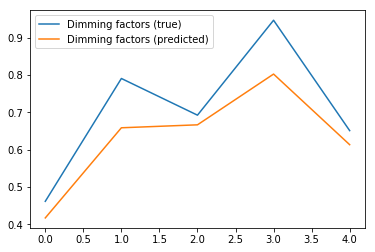

Current loss: 0.011877592653036118
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.0592578649520874, dimming (predicted): 0.03813576698303223


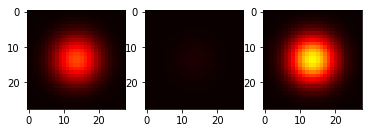

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2615951895713806, dimming (predicted): 0.22516727447509766


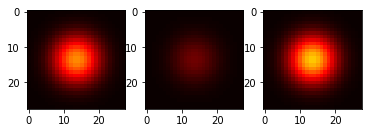

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6417549252510071, dimming (predicted): 0.6820522546768188


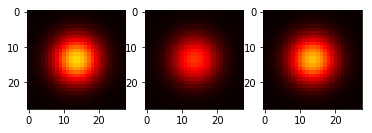

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.49374330043792725, dimming (predicted): 0.47265779972076416


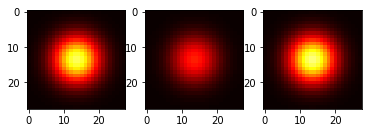

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5288943648338318, dimming (predicted): 0.45307672023773193


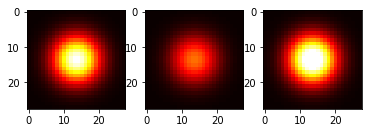

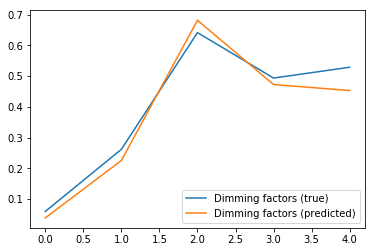

Current loss: 0.003388173645362258
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9955683350563049, dimming (predicted): 0.8333725929260254


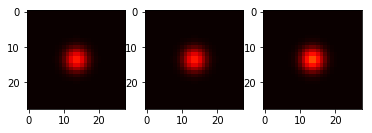

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8510183691978455, dimming (predicted): 0.8015340566635132


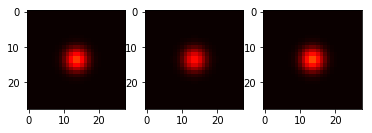

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10388833284378052, dimming (predicted): 0.03616607189178467


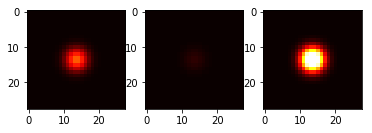

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1686626672744751, dimming (predicted): 0.18123197555541992


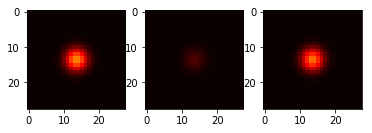

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3079177737236023, dimming (predicted): 0.30014193058013916


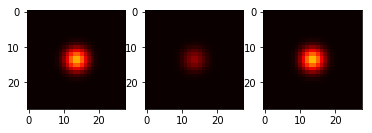

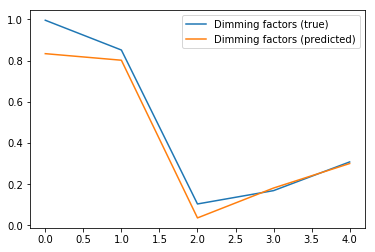

Current loss: 0.0021355468779802322
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2282915711402893, dimming (predicted): 0.22761738300323486


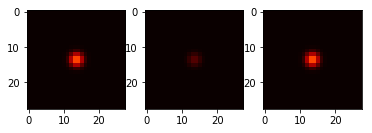

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.27498340606689453, dimming (predicted): 0.32827258110046387


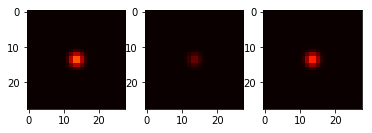

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16563457250595093, dimming (predicted): 0.18170607089996338


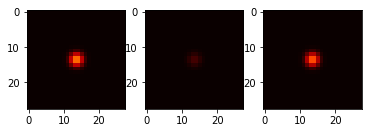

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.27444761991500854, dimming (predicted): 0.3333883285522461


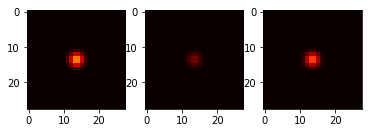

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8132064342498779, dimming (predicted): 0.8263145685195923


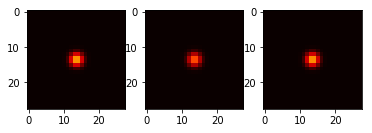

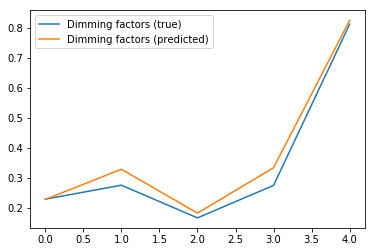

Current loss: 0.027365701273083687
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.12706393003463745, dimming (predicted): 0.04793703556060791


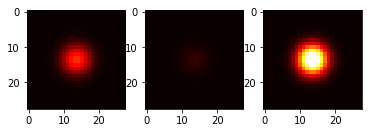

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3038632273674011, dimming (predicted): 0.2280789613723755


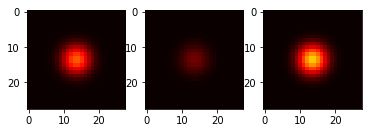

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6451291441917419, dimming (predicted): 0.7158012390136719


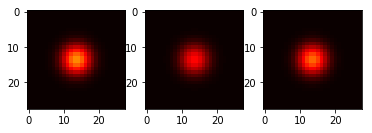

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.25988465547561646, dimming (predicted): 0.24802017211914062


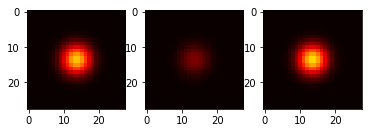

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5900723338127136, dimming (predicted): 0.6286230087280273


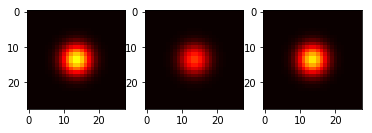

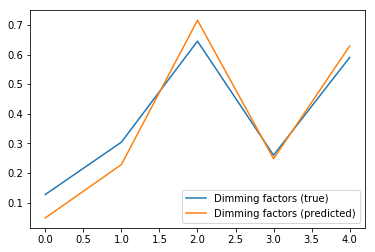

Current loss: 0.02908611297607422
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5427963733673096, dimming (predicted): 0.5844961404800415


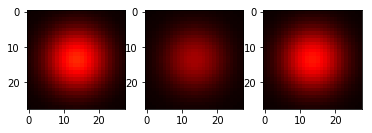

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8664956092834473, dimming (predicted): 0.867104172706604


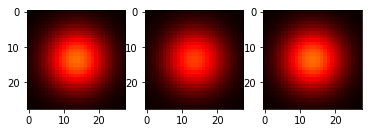

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5258466005325317, dimming (predicted): 0.5141429901123047


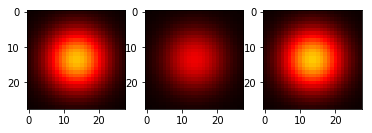

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2656148672103882, dimming (predicted): 0.3604855537414551


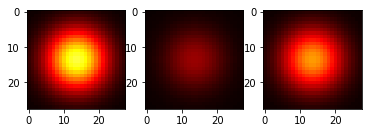

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.45502525568008423, dimming (predicted): 0.5549230575561523


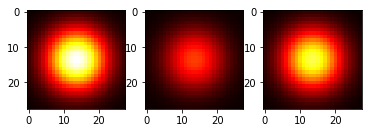

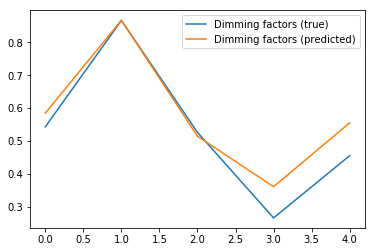

Current loss: 0.002954591065645218
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.17316633462905884, dimming (predicted): 0.216705322265625


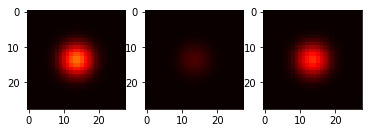

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5320101380348206, dimming (predicted): 0.5568008422851562


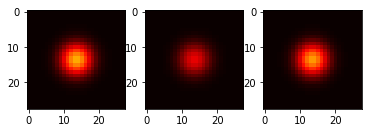

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9607464671134949, dimming (predicted): 0.8624978065490723


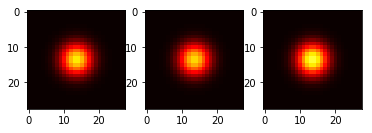

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.24335050582885742, dimming (predicted): 0.14665675163269043


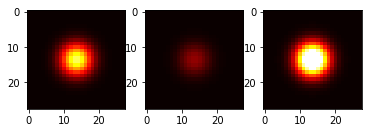

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8812000751495361, dimming (predicted): 0.8021770715713501


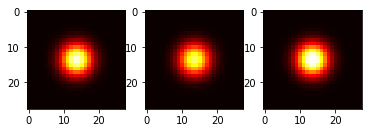

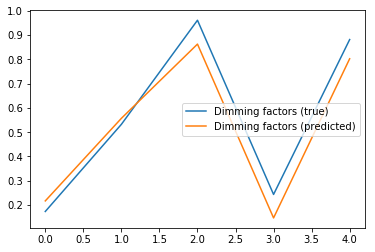

Current loss: 0.0026824604719877243
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8584693670272827, dimming (predicted): 0.8282525539398193


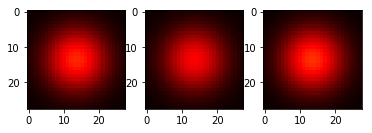

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.487862229347229, dimming (predicted): 0.4728807210922241


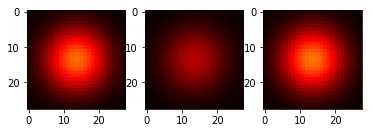

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21768391132354736, dimming (predicted): 0.11955642700195312


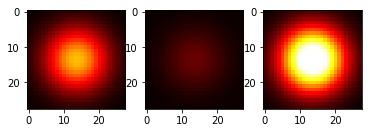

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9724476337432861, dimming (predicted): 0.9214273691177368


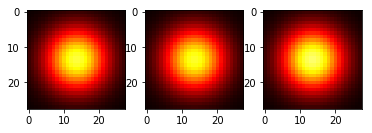

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20997172594070435, dimming (predicted): 0.1984851360321045


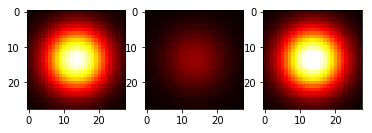

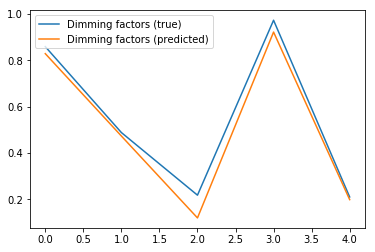

Current loss: 0.019707955420017242
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2993311285972595, dimming (predicted): 0.24436986446380615


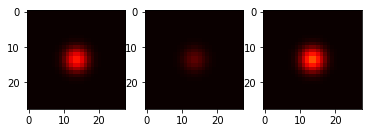

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.24557483196258545, dimming (predicted): 0.22716021537780762


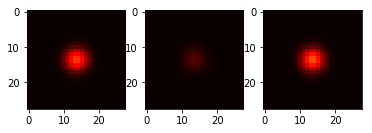

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7532624006271362, dimming (predicted): 0.7251794338226318


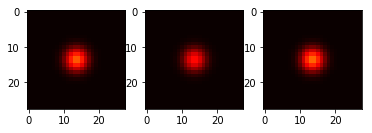

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8644042611122131, dimming (predicted): 0.8279576301574707


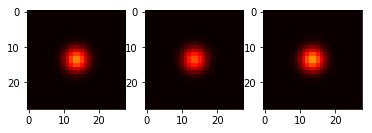

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07445400953292847, dimming (predicted): 0.08772504329681396


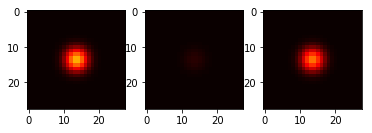

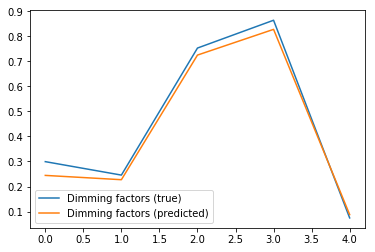

Current loss: 0.0022050098050385714
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.056320250034332275, dimming (predicted): -0.008753478527069092


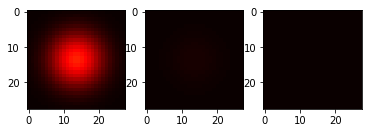

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7862210273742676, dimming (predicted): 0.7603509426116943


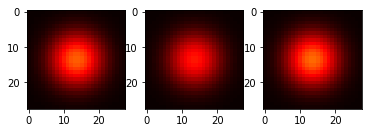

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.12170642614364624, dimming (predicted): 0.08225393295288086


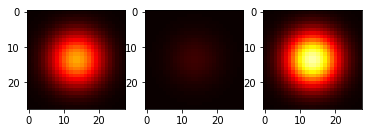

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2967525124549866, dimming (predicted): 0.21745049953460693


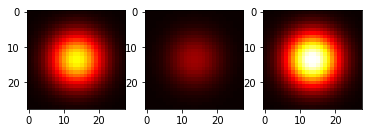

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4843505024909973, dimming (predicted): 0.43422913551330566


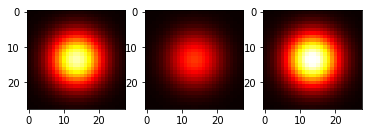

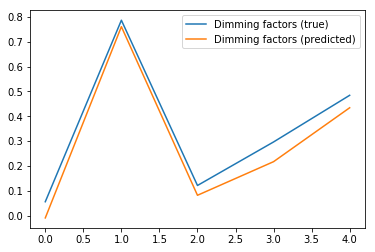

Current loss: 0.001667328062467277
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8758073449134827, dimming (predicted): 0.8562498092651367


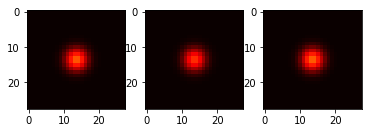

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.351794958114624, dimming (predicted): 0.26558148860931396


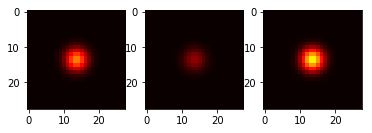

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4023163914680481, dimming (predicted): 0.41456878185272217


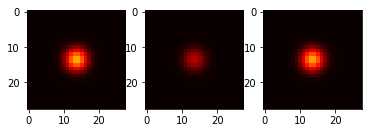

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.22064143419265747, dimming (predicted): 0.2393052577972412


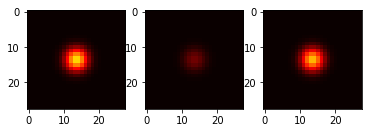

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7307263612747192, dimming (predicted): 0.7409440279006958


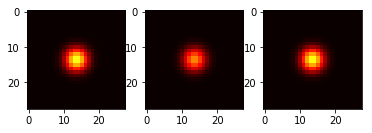

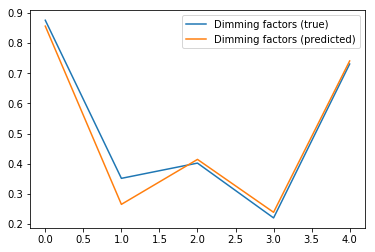

Current loss: 0.001568031613714993
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.314241886138916, dimming (predicted): 0.34267139434814453


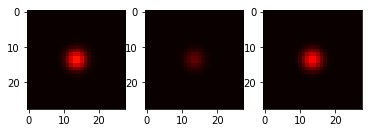

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7605860233306885, dimming (predicted): 0.7931421995162964


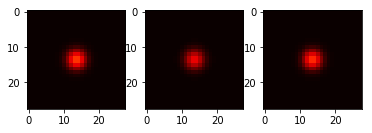

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1352626085281372, dimming (predicted): 0.16888105869293213


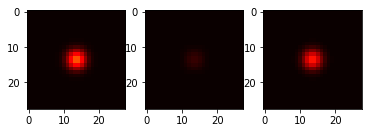

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5765096545219421, dimming (predicted): 0.6006176471710205


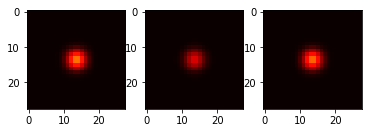

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5963114500045776, dimming (predicted): 0.6065261363983154


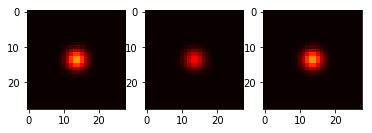

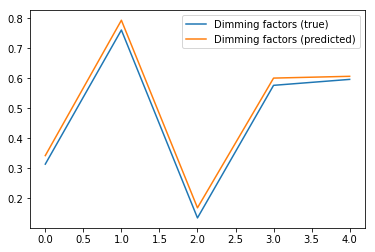

Current loss: 0.0015478635905310512
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7592465281486511, dimming (predicted): 0.7678459882736206


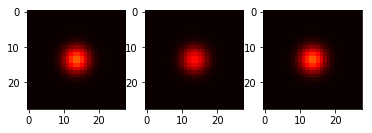

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.11379885673522949, dimming (predicted): 0.13926923274993896


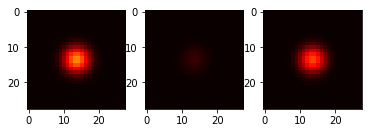

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.719271719455719, dimming (predicted): 0.7086426019668579


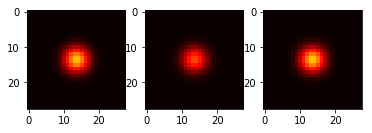

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3239414691925049, dimming (predicted): 0.33299708366394043


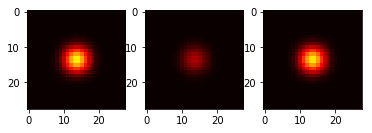

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20567280054092407, dimming (predicted): 0.15513861179351807


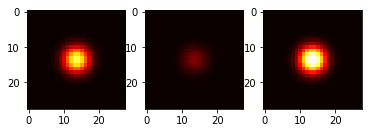

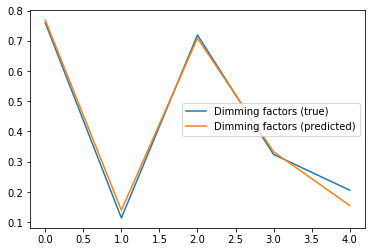

Current loss: 0.0018307976424694061
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.48154687881469727, dimming (predicted): 0.5572477579116821


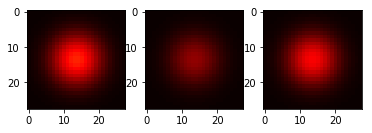

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.42055755853652954, dimming (predicted): 0.4632657766342163


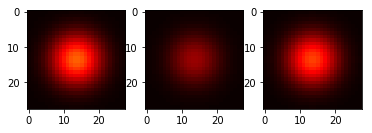

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8787447810173035, dimming (predicted): 0.8419375419616699


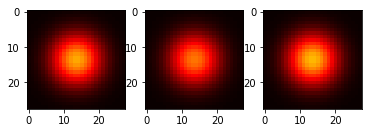

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9152045845985413, dimming (predicted): 0.901435136795044


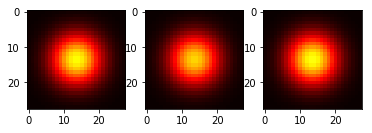

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.39765721559524536, dimming (predicted): 0.3895622491836548


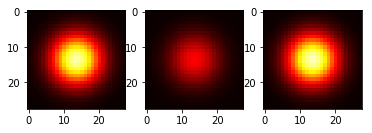

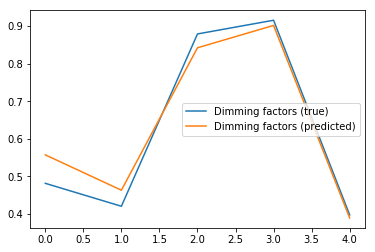

Current loss: 0.004014068748801947
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10099929571151733, dimming (predicted): 0.11435294151306152


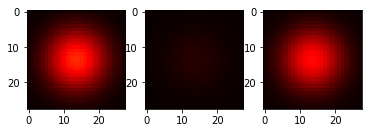

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7092324495315552, dimming (predicted): 0.8280645608901978


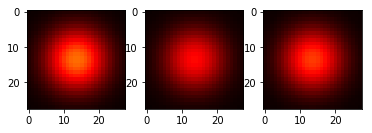

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2844080328941345, dimming (predicted): 0.3475668430328369


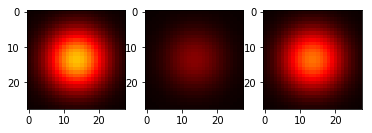

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.767387330532074, dimming (predicted): 0.873327374458313


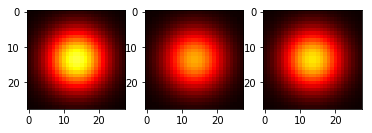

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1989898681640625, dimming (predicted): 0.2383134365081787


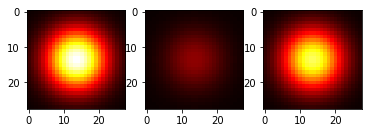

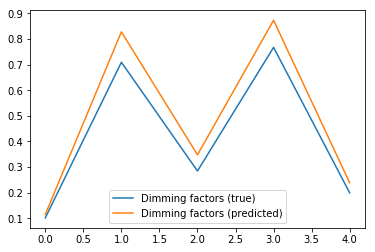

Current loss: 0.001605067402124405
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6395991444587708, dimming (predicted): 0.6368718147277832


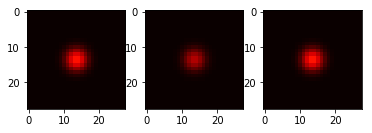

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.05468559265136719, dimming (predicted): 0.11295390129089355


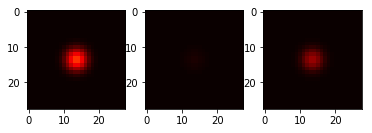

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7120694518089294, dimming (predicted): 0.7278300523757935


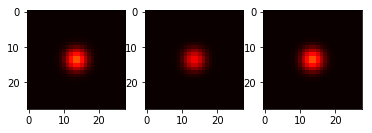

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07868033647537231, dimming (predicted): 0.10969936847686768


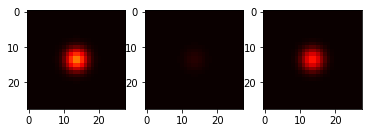

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2486358880996704, dimming (predicted): 0.21639621257781982


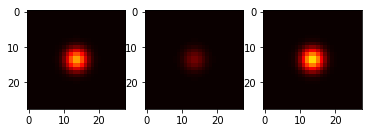

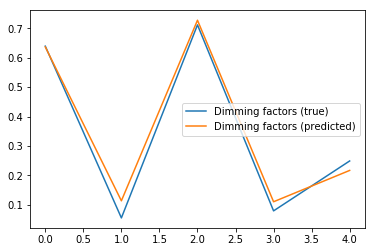

Current loss: 0.0030513699166476727
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.13435935974121094, dimming (predicted): 0.17925810813903809


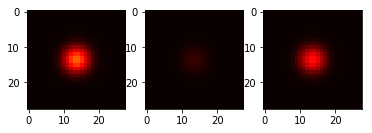

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.44694578647613525, dimming (predicted): 0.4573025703430176


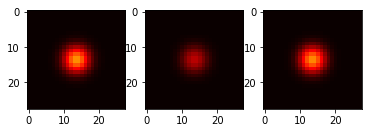

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.686480700969696, dimming (predicted): 0.7070317268371582


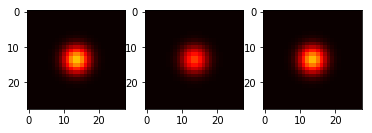

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6009821891784668, dimming (predicted): 0.666838526725769


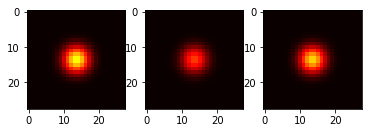

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9779499769210815, dimming (predicted): 0.921270489692688


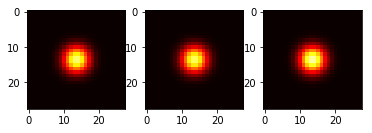

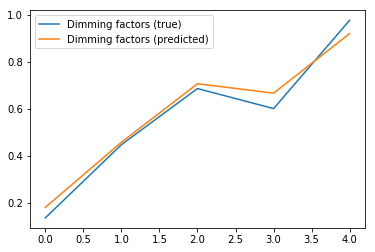

Current loss: 0.0023381973151117563
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.27282941341400146, dimming (predicted): 0.2406013011932373


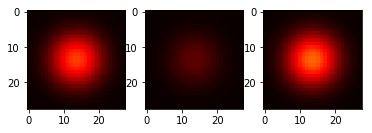

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.41585057973861694, dimming (predicted): 0.5273722410202026


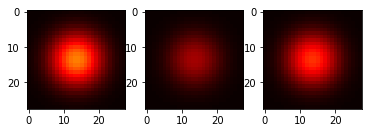

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7762801051139832, dimming (predicted): 0.8367958068847656


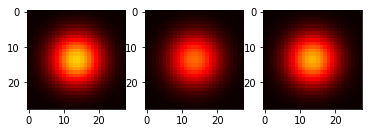

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.31936877965927124, dimming (predicted): 0.36601388454437256


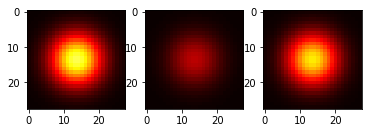

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9095287919044495, dimming (predicted): 0.916628360748291


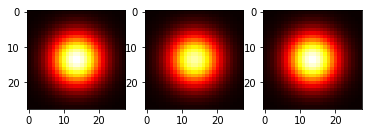

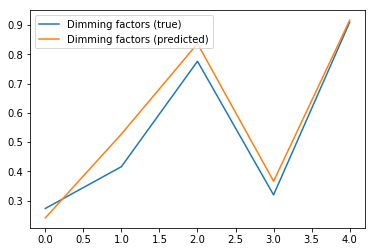

Current loss: 0.005489807575941086
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2717026472091675, dimming (predicted): 0.2322995662689209


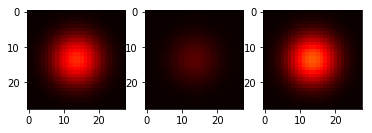

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.00445103645324707, dimming (predicted): -0.15386909246444702


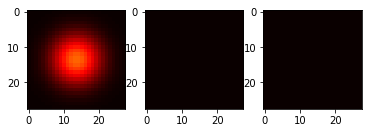

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8253088593482971, dimming (predicted): 0.767069935798645


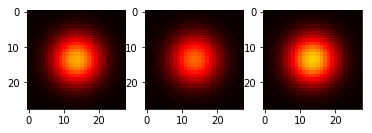

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7818740606307983, dimming (predicted): 0.6690665483474731


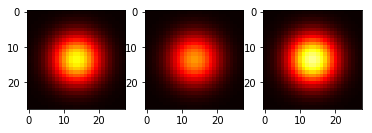

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.790573000907898, dimming (predicted): 0.7424689531326294


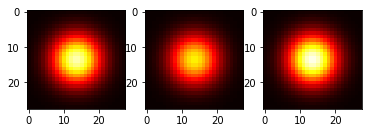

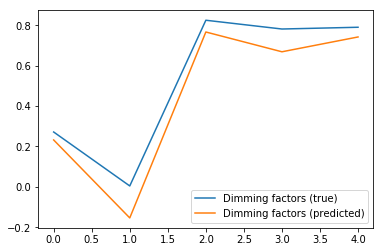

Current loss: 0.0034308007452636957
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.25450974702835083, dimming (predicted): 0.15682578086853027


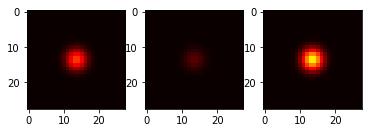

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8449768424034119, dimming (predicted): 0.8275691270828247


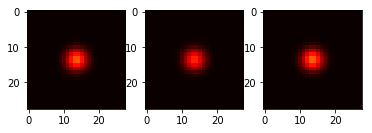

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.22326594591140747, dimming (predicted): 0.170379638671875


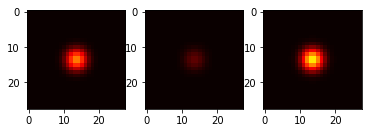

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.14571869373321533, dimming (predicted): 0.18297600746154785


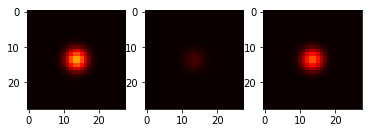

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8427086472511292, dimming (predicted): 0.7578363418579102


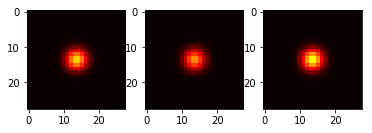

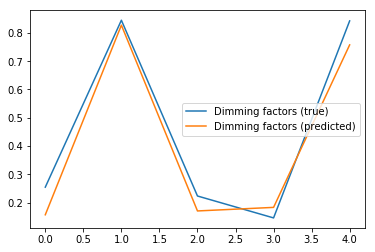

Current loss: 0.0037762934807687998
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.21418225765228271, dimming (predicted): 0.18179810047149658


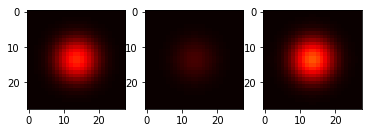

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3524305820465088, dimming (predicted): 0.33067476749420166


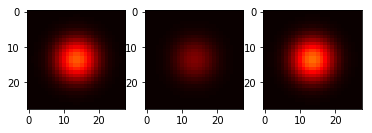

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2564602494239807, dimming (predicted): 0.2830324172973633


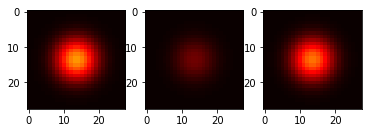

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4331914186477661, dimming (predicted): 0.42410194873809814


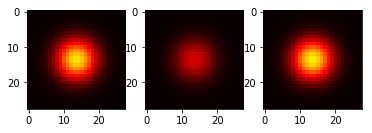

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4753817319869995, dimming (predicted): 0.5523543357849121


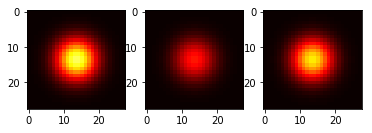

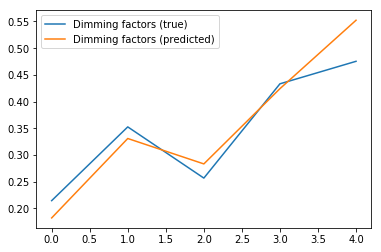

Current loss: 0.0041288528591394424
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9698469042778015, dimming (predicted): 0.9043318033218384


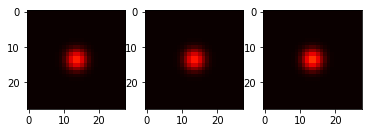

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9119974970817566, dimming (predicted): 0.8071759939193726


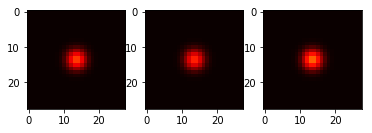

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7302452921867371, dimming (predicted): 0.7915877103805542


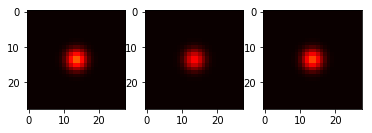

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5196126699447632, dimming (predicted): 0.5444036722183228


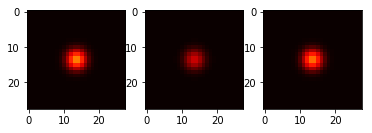

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7761791944503784, dimming (predicted): 0.830153226852417


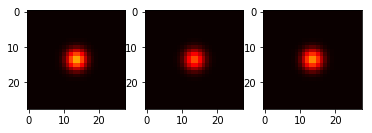

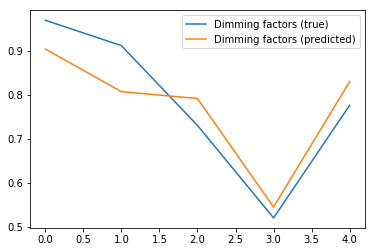

Current loss: 0.007656652480363846
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5848956108093262, dimming (predicted): 0.6993433237075806


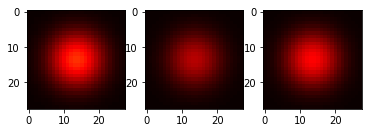

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.30142903327941895, dimming (predicted): 0.2518664598464966


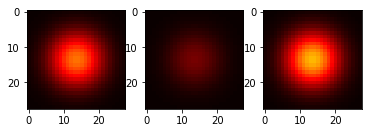

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.20250165462493896, dimming (predicted): 0.13991951942443848


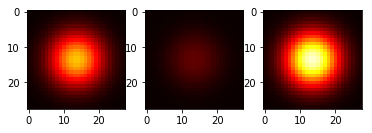

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4580962657928467, dimming (predicted): 0.4498234987258911


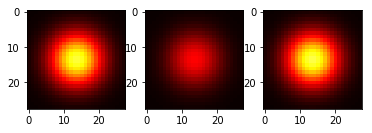

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.15205258131027222, dimming (predicted): 0.11525940895080566


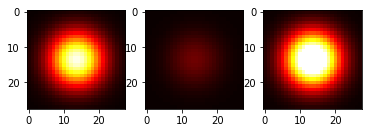

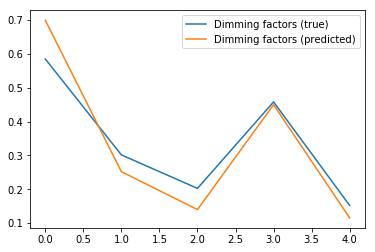

Current loss: 0.002055748598650098
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16467821598052979, dimming (predicted): 0.13056838512420654


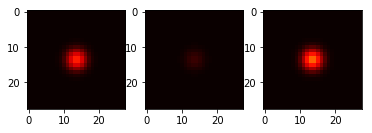

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5060019493103027, dimming (predicted): 0.470306396484375


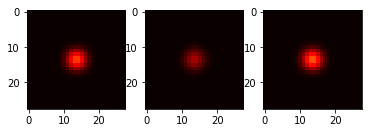

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.457161545753479, dimming (predicted): 0.4195127487182617


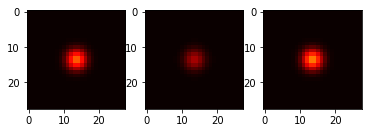

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8671801090240479, dimming (predicted): 0.8393087387084961


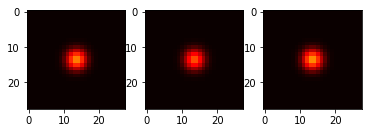

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.22465461492538452, dimming (predicted): 0.1965012550354004


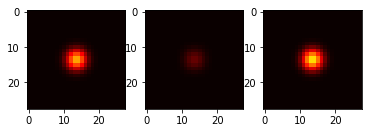

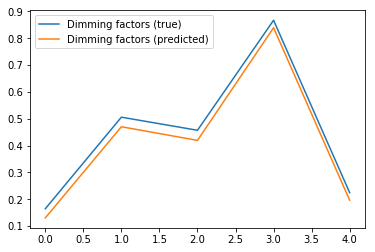

Current loss: 0.003151350189000368
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.05643784999847412, dimming (predicted): 0.03203928470611572


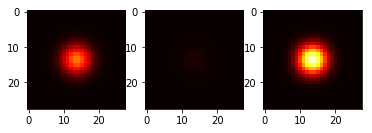

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1933472752571106, dimming (predicted): 0.17032098770141602


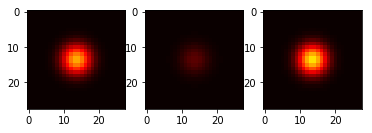

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4686625003814697, dimming (predicted): 0.4851672649383545


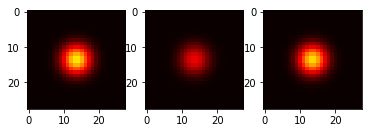

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9898127317428589, dimming (predicted): 0.8918884992599487


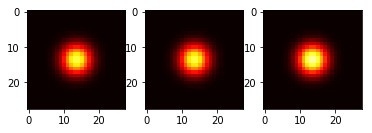

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8950746059417725, dimming (predicted): 0.8203930854797363


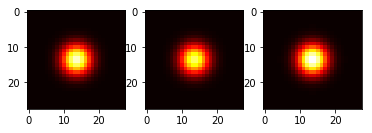

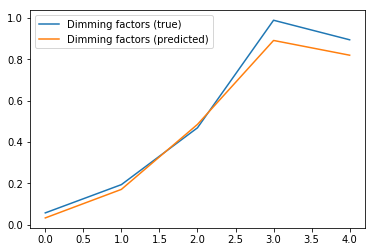

Current loss: 0.010975286364555359
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.024271249771118164, dimming (predicted): 0.03486359119415283


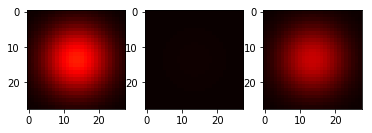

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.3738709092140198, dimming (predicted): 0.370916485786438


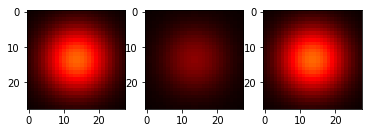

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5713080167770386, dimming (predicted): 0.6207294464111328


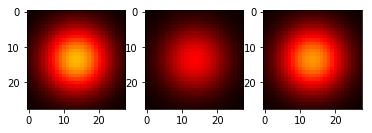

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7964354157447815, dimming (predicted): 0.8443158864974976


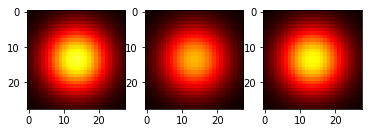

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.0979071855545044, dimming (predicted): 0.1228327751159668


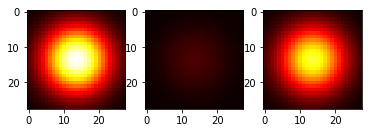

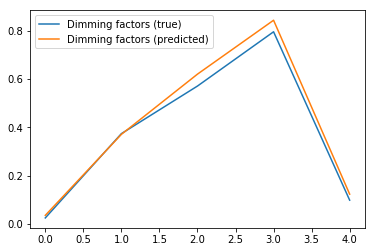

Current loss: 0.0022889571264386177
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8273065686225891, dimming (predicted): 0.7753297090530396


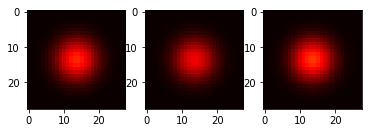

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6940149068832397, dimming (predicted): 0.6719931364059448


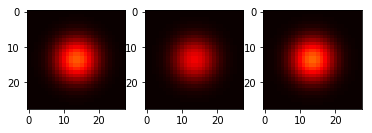

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8665372133255005, dimming (predicted): 0.8095084428787231


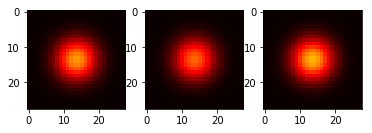

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.552577793598175, dimming (predicted): 0.517475962638855


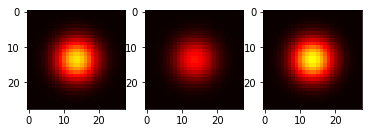

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6840335130691528, dimming (predicted): 0.7044042348861694


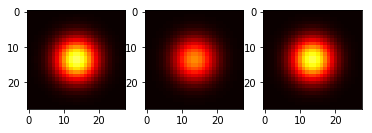

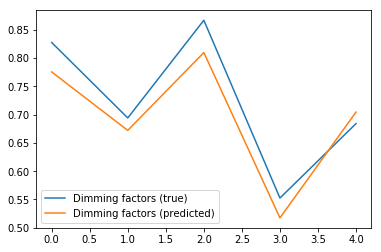

Current loss: 0.02071724459528923
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.1390209197998047, dimming (predicted): 0.17179560661315918


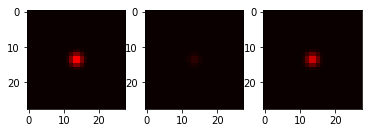

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.16483968496322632, dimming (predicted): 0.22501707077026367


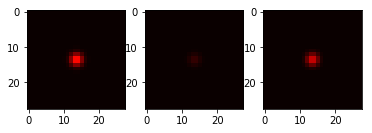

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9994719624519348, dimming (predicted): 0.8977209329605103


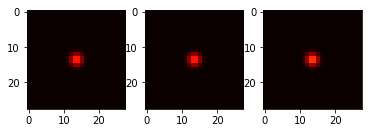

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.363664448261261, dimming (predicted): 0.4235663414001465


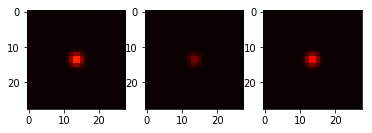

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5649396181106567, dimming (predicted): 0.6232789754867554


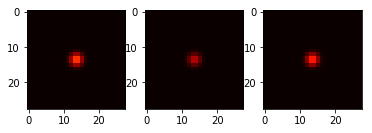

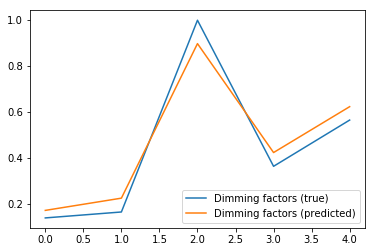

Current loss: 0.0009769066236913204
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8202521204948425, dimming (predicted): 0.8093706369400024


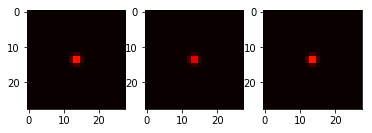

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.009059429168701172, dimming (predicted): -0.029334604740142822


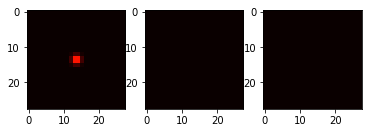

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5933436751365662, dimming (predicted): 0.6558793783187866


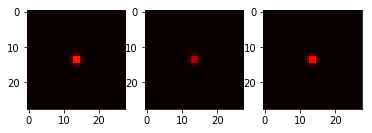

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.8626041412353516, dimming (predicted): 0.8705911636352539


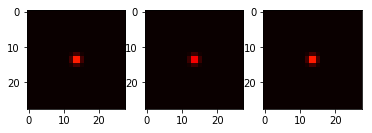

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.37651199102401733, dimming (predicted): 0.40562450885772705


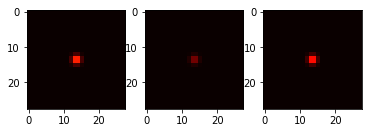

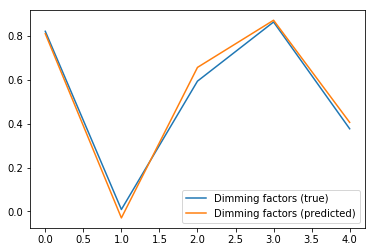

Current loss: 0.000838732928968966
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.11091387271881104, dimming (predicted): 0.1380859613418579


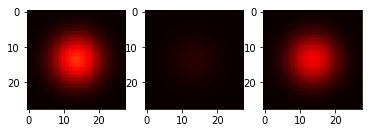

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.25562942028045654, dimming (predicted): 0.255429744720459


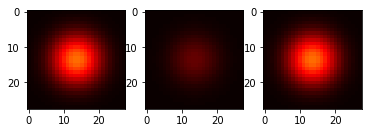

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5479849576950073, dimming (predicted): 0.5385473966598511


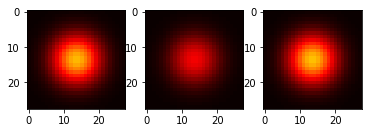

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.5028685331344604, dimming (predicted): 0.46900248527526855


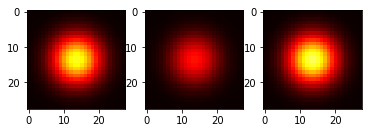

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.6036924123764038, dimming (predicted): 0.587532639503479


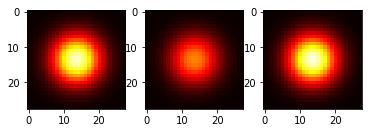

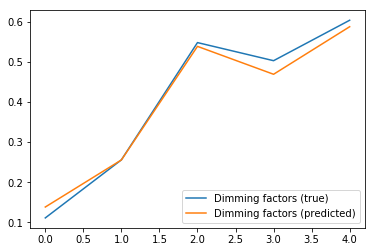

Current loss: 0.004982881247997284
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.10248738527297974, dimming (predicted): 0.16964340209960938


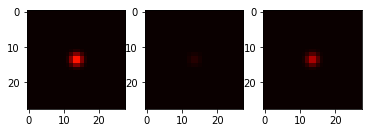

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7788270711898804, dimming (predicted): 0.85056471824646


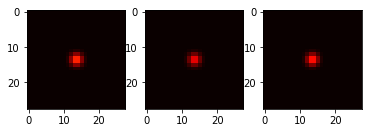

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.07404381036758423, dimming (predicted): 0.15177059173583984


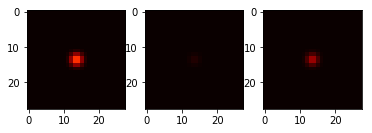

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.4422007203102112, dimming (predicted): 0.4975473880767822


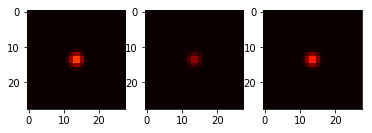

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7212690711021423, dimming (predicted): 0.7695344686508179


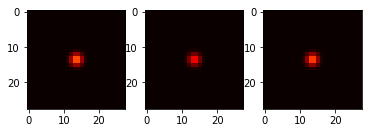

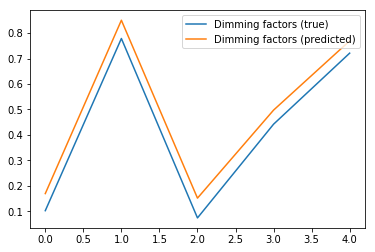

Current loss: 0.0033006849698722363
Channel: 0 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.7675989270210266, dimming (predicted): 0.766511082649231


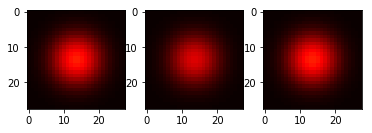

Channel: 1 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.23280584812164307, dimming (predicted): 0.31988608837127686


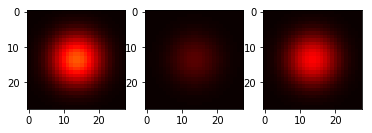

Channel: 2 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.2775166630744934, dimming (predicted): 0.39752817153930664


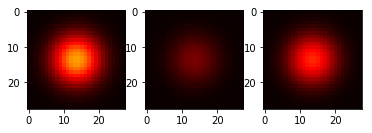

Channel: 3 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.815677285194397, dimming (predicted): 0.8421579599380493


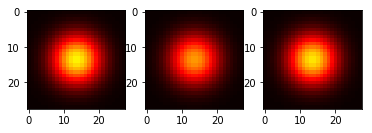

Channel: 4 (left: original, middle: dimmed, right: undimmed)
Dimming (true): 0.9295021295547485, dimming (predicted): 0.9142597913742065


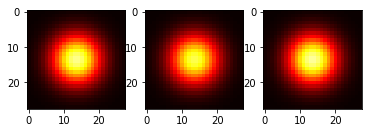

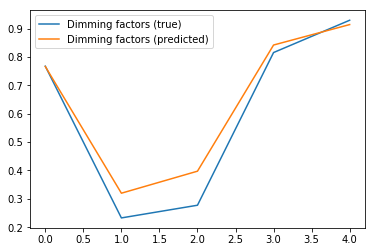

In [6]:
num_channels = 5
batch_size = 4

model = NetCNN(input_shape=[num_channels, 28, 28], output_dim=num_channels)
model.train()
optimizer = torch.optim.Adam(model.parameters())

for b in range(1000):
    data = torch.cat([make_sun_multi_channel(num_channels=num_channels) for i in range(batch_size)]).view(batch_size, num_channels, 28, 28)
    data_min, data_max = torch.min(data), torch.max(data)
    dim_factors = torch.rand(batch_size, num_channels).view(batch_size,-1).to(device)
#     print(batch.shape)
#     print(dim_factors.shape)
    dimmed_data = data.clone().to(device)
    for i in range(batch_size):
        for j in range(num_channels):
            dimmed_data[i, j] *= dim_factors[i, j]

    optimizer.zero_grad()
    output = model(dimmed_data)
    loss = nn.MSELoss()(output, dim_factors)
    loss.backward()
    optimizer.step()
    
    if b % 10 == 0:
        print('Current loss: {}'.format(float(loss)))
        sample = data[0].numpy()
        sample_dimmed = dimmed_data[0].numpy()

        for i, (channel, channel_dimmed) in enumerate(zip(sample, sample_dimmed)):
            fig = plt.figure()
            ax1 = fig.add_subplot(1, 3, 1)
            ax1.imshow(channel, norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            ax2 = fig.add_subplot(1, 3, 2)
            ax2.imshow(channel_dimmed, norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            ax3 = fig.add_subplot(1, 3, 3)
            ax3.imshow(channel_dimmed / float(output[0, i]), norm=None, cmap='hot', vmin=data_min, vmax=data_max)
            print('Channel: {} (left: original, middle: dimmed, right: undimmed)\nDimming (true): {}, dimming (predicted): {}'.format(i, dim_factors[0, i], output[0, i]))
            plt.show()
        dim_factors_numpy = dim_factors[0].view(-1).cpu().numpy()
        plt.plot(dim_factors_numpy, label='Dimming factors (true)')
        output_numpy = output[0].detach().view(-1).cpu().numpy()
        plt.plot(output_numpy, label='Dimming factors (predicted)')
        plt.legend()
        plt.show()
    